# Turkey Earthquake Analysis

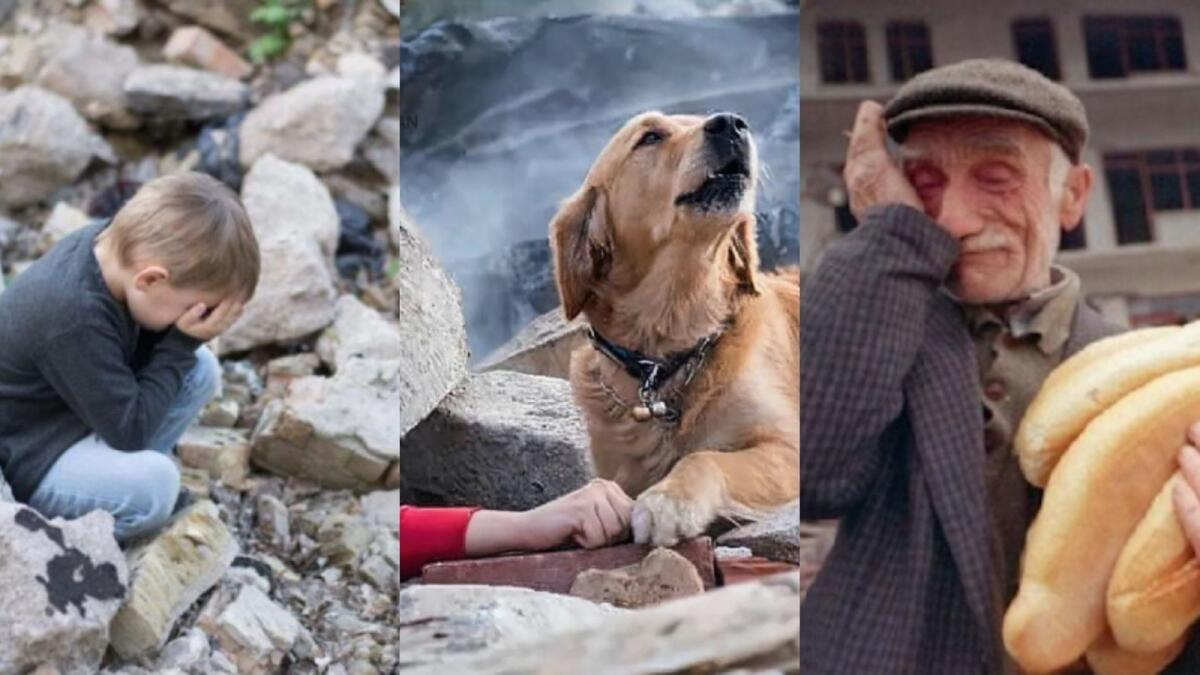

---
As we are aware, earthquakes can have profound impacts on cities or countries, affecting their economy, and culture, and causing loss of life, particularly when they occur at high magnitudes. Earthquakes are natural disasters, and their timing cannot be predicted. The majority of earthquakes are a result of the movement of the Earth's tectonic plates. Additionally, human activities can induce earthquakes, such as constructing large dams, and bridges, drilling into the ground, excavating coal mines, or drilling oil wells.

While predicting earthquakes remains a challenge, various scientific techniques analyse historical seismic data to identify potential patterns and trends for forecasting. These methods, often referred to as statistical approaches, aim to understand seismic behaviour over extended periods. Turkey, located at the convergence of the Eurasian and Arabian tectonic plates, exemplifies such seismic activity. Notably, fault lines like the North Anatolian Fault and East Anatolian Fault contribute to Turkey's susceptibility to earthquakes. Notable events include the devastating 1999 Izmit earthquake, the 2011 Van earthquake and the impactful 2023 Kahramanmaraş earthquake. Governmental and scientific efforts in Turkey focus on earthquake preparedness through building codes and public awareness initiatives, supported by a network of seismological observatories. Given the complexity of seismic trends, advanced statistical techniques play a crucial role in comprehending and predicting earthquakes.
Both statistical methods and clustering techniques contribute to the broader field of earthquake forecasting. While statistical methods analyse historical data to discern trends and potential future events, clustering methods provide insights into the spatial and temporal distribution of seismic activity, aiding in the understanding of earthquake dynamics. Integrating these methodologies enhances our ability to comprehend and anticipate seismic events, ultimately contributing to improved earthquake preparedness and mitigation strategies
In our article, we will analyze the Turkey Earthquake data deeply, we will answer all your questions with visualizations. Also, we will focus on and use the cluster method of DBSCAN (Density-Based Spatial Clustering of Applications with Noise).

Little remark about Turkey's earthquake data:
AFAD Event Catalog is a database of earthquakes that have occurred in and around Turkey. AFAD stands for the Disaster and Emergency Management Presidency of Turkey which is responsible for managing disasters and emergencies in the country. You can find all the information in the [AFAD](https://deprem.afad.gov.tr/event-catalog)

---

# Installing External Libraries

We install crucial libraries. Especially, these libraries are used for position of Turkey and visualization of the data.

In [1]:
pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 38.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install basemap-data-hires

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 MB 12.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


# Import Libraries

In this section, we import necessary libraries to project.

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
import re
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import plotly.express as px
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.cluster import DBSCAN 
from sklearn.metrics import silhouette_score
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import date
from datetime import timedelta
import datetime
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sns.set(style="white", context="talk")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore",category=plt.cbook.mplDeprecation)
import geopandas as gpd
import warnings 
%matplotlib inline
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

/tmp/ipykernel_21/3565426751.py:26: MatplotlibDeprecationWarning: mplDeprecation was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use matplotlib.MatplotlibDeprecationWarning instead.
  warnings.filterwarnings("ignore",category=plt.cbook.mplDeprecation)


# Read CSV Files

Taking all files from kaggle input place

In [5]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/turkey-20-years-earthquakes-csv/eq20.csv


# Information about Data


Reading file using encoding that determines how the characters in the file are represented. Our dataset has turkish characters. For this reason, utf_16 is good choice to represent these characters.

In [6]:
df = pd.read_csv('/kaggle/input/turkey-20-years-earthquakes-csv/eq20.csv', encoding="utf_16", on_bad_lines="skip")

In [7]:
df.head(5)

ID                DATE_            LOCATION_      LAT      LNG  MAG  DEPTH  \
0   1  2005-01-01 00:29:42  KORKUTELi (ANTALYA)  36.9197  30.3133  2.9   30.0   
1   2  2005-01-01 03:03:40        YUNAK (KONYA)  38.8177  31.8875  3.5    5.8   
2   3  2005-01-01 04:40:14              AKDENiZ  36.1153  28.4915  3.5   74.5   
3   4  2005-01-01 09:35:00       CUBUK (ANKARA)  40.3485  32.9603  3.0   15.1   
4   5  2005-01-01 11:17:43      MENEMEN (iZMiR)  38.8013  27.2075  2.9   28.3   

                      RECORDDATE  
0  2023-02-27 15:01:52.367000000  
1  2023-02-27 15:01:52.367000000  
2  2023-02-27 15:01:52.367000000  
3  2023-02-27 15:01:52.367000000  
4  2023-02-27 15:01:52.367000000

**Information about features**

* **Date:** Date of earthquake

* **Location:** Location of earthquake

* **LAT:** Latitute of place

* **LNG:** Longitute of place

* **MAG:** Magnitude is the size of the earthquake

* **DEPTH:**  indicates that shallow earthquakes are between 0 and 70 km deep; intermediate earthquakes, 70 - 300 km deep; and deep earthquakes, 300 - 700 km deep

df.shape

In [8]:
df=df.drop(['RECORDDATE'],axis=1)
df=df.drop(['ID'],axis=1)

**Data Types**

In [9]:
df.dtypes

DATE_         object
LOCATION_     object
LAT          float64
LNG          float64
MAG          float64
DEPTH        float64
dtype: object

**Checking Null Values**

In [10]:
df.isnull().sum()

DATE_        0
LOCATION_    0
LAT          0
LNG          0
MAG          0
DEPTH        0
dtype: int64

**Checking Duplicated Values**

In [11]:
df.duplicated().sum()

0

**Statistical Analysis**

In [12]:
df.describe()

LAT            LNG            MAG          DEPTH
count  284583.000000  284583.000000  284583.000000  284583.000000
mean       38.234964      31.376644       2.212529       9.774072
std         1.478462       5.534374       0.666044      10.137096
min        30.288700      18.343500       0.100000       0.000000
25%        37.078500      27.400700       1.700000       5.000000
50%        38.309500      28.804700       2.100000       7.300000
75%        39.233000      35.924300       2.700000      12.000000
max        45.809300      48.572500       7.600000     188.000000

# Clean Data 

In this section, we remove unknown words,and substrings.Also, we fix city names.

In [13]:
df['Provience'] = df['LOCATION_'].str.split('\s+\(').str[0]  # Split on the first occurrence of '(' and keep the first part
df['LOCATION_']=df['LOCATION_'].astype(str)

Removing inside brackets from location feature

In [14]:
def remove_content_inside_brackets(location):
     return re.sub(r'\s*\[.*', '', location, flags=re.UNICODE)
                 
df['LOCATION_'] = df['LOCATION_'].apply(remove_content_inside_brackets)

Fixing city, and country names

In [15]:
def fix_city_name(row):
    row=row.replace('TUNCEL?', 'TUNCELI)')
    row=row.replace('MU?', 'MUS)')
    row=row.replace('ARTV?', 'ARTVIN)')
    row=row.replace('ELAZI?', 'ELAZIG)')
    row=row.replace('KAYSER?', 'KAYSERI)')
    row=row.replace('DEN?L?', 'DENIZLI)')
    row=row.replace('S?RT','SIIRT)')
    row=row.replace('HAKKAR?','HAKKARI)')
    row=row.replace('I?IR','IGDIR)')
    row=row.replace('KIR?H?','KIRSEHIR)')
    row=row.replace('KOCAEL?','KOCAELI)')
    row=row.replace('GUrcistan','GURCISTAN')
    row=row.replace('GURC?TAN','GURCISTAN')
    row=row.replace('AKDENIZ2','AKDENIZ')
    row=row.replace('G?CiSTAN','GURCISTAN')
    row=row.replace('S?OP','SINOP')
    row=row.replace('BULGAR?TAN ','BULGARISTAN')
    row=row.replace('BULGAR?TAN','BULGARISTAN')
    row=row.replace('KIRKLAREL?','KIRKLARELI)')
    row=row.replace('NEVSEH?','NEVSEHIR')
    row=row.replace('?NAKKALE','CANAKKALE')
    row=row.replace('BALIKES?','BALIKKESIR')
    row=row.replace('G?CISTAN','GURCISTAN')
    row=row.replace('S?AS','SIVAS')
    row=row.replace('ERZ?CAN','ERZINCAN')
    row=row.replace('?RUM','CORUM')
    row=row.replace('B?GOL','BINGOL')
    row=row.replace('D?ARBAKIR','DIYARBAKIR')
    row=row.replace('?NLIURFA','SANLIURFA')
    row=row.replace('ED?NE','EDIRNE')
    row=row.replace('OSMAN?E','OSMANIYE')
    row=row.replace('ED?NE','EDIRNE')
    row=row.replace('B?EC?','BILECIK')
    row=row.replace('?NKIRI','CANKIRI')
    row=row.replace('B?L?','BOLU')
    row=row.replace('ERMEN?TAN','ERMENISTAN')
    row=row.replace('SUR?E','SURIYE')
    row=row.replace('MERS?','MERSIN')
    row=row.replace('ESK?EH?','ESKISEHIR')
    row=row.replace('AFYONKARAH?AR','AFYONKARAHISAR')
    row=row.replace('N?DE','NIGDE')
    row=row.replace('ERMENISTAN SINIR B?GESI','ERMENISTAN SINIR BOLGESI')
    row=row.replace('GAZ?NTEP','GAZIANTEP')
    row=row.replace('YUNAN?TAN','YUNANISTAN')
    row=row.replace('?RNAK','SIRNAK')
    row=row.replace('A?I','AGRI')
    row=row.replace('?AN SINIR B?GES?','IRAN SINIR BOLGESI')
    row=row.replace('KARADEN?','KARADENIZ')
    row=row.replace('TEK?DAG','TEKIRDAG')
    row=row.replace('MARD?','MARDIN')
    row=row.replace('G?ESUN','GIRESUN')
    row=row.replace('SAK ART VELO','GURCISTAN')
    row=row.replace('AKDEN?','AKDENIZ')
    row=row.replace('K?AHYA','KUTAHYA')
    row=row.replace('MAN?A','MANISA')
    row=row.replace('BiLECiK', 'BILECIK')
    row=row.replace('GAZiANTEP', 'GAZIANTEP')
    row=row.replace('ESKiSEHiR', 'ESKISEHIR')
    row=row.replace('DiYARBAKIR', 'DIYARBAKIR')
    row=row.replace('NiGDE', 'NIGDE')
    row=row.replace('TEKiRDAG', 'TEKIRDAG')
    row=row.replace('GiRESUN', 'GIRESUN')
    row=row.replace('KOCAELi', 'KOCAELI')
    row=row.replace('SiiRT', 'SIIRT')
    row=row.replace('SiNOP', 'SINOP')
    row=row.replace('KIRKLARELi', 'KIRKLARELI')
    row=row.replace('KiLiS', 'KILIS')
    row=row.replace('MARDiN', 'MARDIN')
    row=row.replace('ARTViN', 'ARTVIN')
    row=row.replace('RiZE', 'RIZE')
    row=row.replace('iZMiR', 'IZMIR')
    row=row.replace('iZMiT', 'IZMIT')
    row=row.replace('MERSiN', 'MERSIN')
    row=row.replace('BiTLiS', 'BITLIS')
    row=row.replace('OSMANiYE', 'OSMANIYE')
    row=row.replace('HAKKARi', 'HAKKARI')
    row=row.replace('KIRSEHiR', 'KIRSEHIR')
    row=row.replace('NEVSEHiR', 'NEVSEHIR')
    row=row.replace('iSTANBUL', 'ISTANBUL')
    row=row.replace('TUNCELi', 'TUNCELI')
    row=row.replace('KAYSERi', 'KAYSERI')
    row=row.replace('EDiRNE', 'EDIRNE')
    row=row.replace('SiVAS', 'SIVAS')
    row=row.replace('AFYONKARAHiSAR', 'AFYONKARAHISAR')
    row=row.replace('DENiZLi', 'DENIZLI')
    row=row.replace('MANiSA', 'MANISA')
    row=row.replace('BALIKESiR', 'BALIKESIR')
    row=row.replace('ERZiNCAN', 'ERZINCAN')
    row=row.replace('BiNGOL', 'BINGOL')
    row=row.replace('KIRGECiT', 'CANAKKALE')
    row=row.replace("SAK'ART'VELO", 'GURCISTAN')
    row=row.replace("EGE DENiZi", 'EGE DENIZI')
    row=row.replace('M??L?','MIDILLI')
    row=row.replace('S?AM','SISAM')
    row=row.replace('SiSAM','SISAM')
    row=row.replace('ON??','ONIKI')
    row=row.replace('MiDiLLi','MIDILLI')
    row=row.replace('GiRit','GIRIT')
    row=row.replace('ONiKi','ONIKI')
    row=row.replace('DEN??','DENIZI')
    row=row.replace('KARADENiZ','KARADENIZ')
    row=row.replace('AKDENiZ','AKDENIZ')
    row=row.replace('YUNANiSTAN','YUNANISTAN')
    row=row.replace('SEFERiHiSAR','SEFERIHISAR')
    
    
    return row

df['LOCATION_'] = df['LOCATION_'].apply(fix_city_name)

Removing unknown words

In [16]:
def remove_unknown(df):   
    substrings_to_remove = ['\\?AN', 'K\\?\\?', '\\?N\\? G\\?\\?','\\?M\\?']
    df = df[~df['LOCATION_'].str.contains('|'.join(substrings_to_remove))].reset_index()
    return df

df=remove_unknown(df)

Removing substrings from data 

In [17]:
def remove_after_substring(row, substring):
    return row['LOCATION_'].split(substring)[0].strip()

# List of substrings to remove
substrings_to_remove = ['REVIZE01', 'REVIZE02', 'REVIZE03', 'REVIZE04', 'Otomatik', 'G?2', 'G?1', 'ilksel1', 'lksel2','İlksel','Ylksel','lksel']

# Apply the custom function for each substring in the DataFrame
for substring in substrings_to_remove:
    df['LOCATION_'] = df.apply(remove_after_substring, args=(substring,), axis=1)

# Feature Extraction

In this section, we extract date-time, earthquake categories,geographical divisions and seasonal features.

**Date-time Features**

In [18]:
df['DATE_']=pd.to_datetime(df['DATE_'])
import math

def date_time_features(df):

  
    df['day'] =df['DATE_'].dt.day
    df['date']=df['DATE_'].dt.date
    df['hour'] =df['DATE_'].dt.hour
    df['minute'] =df['DATE_'].dt.minute
    df['second'] =df['DATE_'].dt.second
    df['quarter'] = df['DATE_'].dt.quarter
    df['month'] = pd.to_datetime(df['DATE_'], errors='coerce').dt.month
    df['year'] = pd.to_datetime(df['DATE_'], errors='coerce').dt.year
    df['dayofyear'] = pd.to_datetime(df['DATE_'], errors='coerce').dt.dayofyear
    df['weekofyear'] = pd.to_datetime(df['DATE_'], errors='coerce').dt.weekofyear
    df['weekday'] =pd.to_datetime(df['DATE_'], errors='coerce').dt.weekday 
    df['season'] = df.month%12 // 3 + 1

    
    return df

df = date_time_features(df)

**Earthquake Categories**

In [19]:

category_patterns = {
    'Island': r'\b(adası|girit|adasi|adalar)\b',
    'Country': r'\b(yunanistan|suriye|ırak|irak|iran|bulgaristan|kibris|gurcistan|kktc|azerbaijan|azerbaycan|bulgaria|southern greece|ukraine|libya|armenia|lubnan|ermenistan|makedonya|romanya|ermenistan|arnavutluk|mısır|rusya|turkey|misir|region)\b',  # Add more countries if needed
    'Sea': r'\b(denizi|aciklari|sea|körfez|korfezi)\b',
    'Gulk': r'\b(körfez|korfezi)\b',
    'Lake':r'\b(golu)\b',
    'Region': r'\b(akdeniz|karadeniz|ege|dogu anadolu|güneydogu anadolu|ic anadolu|marmara)\b',
    'Border':r'\b(siniri|sinir bolgesi)\b',
    'Hellespont': r'\b(bogazi)\b'
    
}

In [20]:
def extract_category_or_province(location):
    for category, pattern in category_patterns.items():
        if re.search(pattern, location.lower()):
            return category    
            
    if '(' in location and ')' in location:
        city, _, province = location.partition('(')
        city = city.strip()
        province = province.replace(')', '').strip()
        return province
    elif '-' in location:
        city, _, province = location.partition('-')
        city = city.strip()
        province = province.replace('-', '').strip()
        return province
    else:
        return location



df['Category'] = df['LOCATION_'].apply(extract_category_or_province)

**Geographical Divisions**

In [21]:
regions = {
'EGE': ['IZMIR', 'MANISA', 'AYDIN', 'USAK', 'KUTAHYA', 'AFYON', 'DENIZLI', 'MUGLA'],
'IC ANADOLU':['AKSARAY', 'ANKARA', 'CANKIRI', 'ESKISEHIR', 'KARAMAN', 'KAYSERI', 'KIRIKKALE', 'KIRSEHIR', 'KONYA', 'NEVSEHIR', 'NIGDE', 'SIVAS', 'YOZGAT'],
'KARADENIZ':['AMASYA','ARTVIN','BARTIN','BAYBURT','BOLU','CORUM','DUZCE','GUMUSHANE','GIRESUN','KARABUK','KASTAMONU','ORDU','RIZE','SAMSUN','SINOP','TOKAT','TRABZON','ZONGULDAK'] ,
'MARMARA': ['ISTANBUL','TEKIRDAG','EDIRNE','KIRKLARELI','CANAKKALE','KOCAELI','YALOVA','SAKARYA','BILECIK' 'BALIKESIR', 'BURSA'],
'GUNEYDOGU ANADOLU': ['ADIYAMAN', 'DİYARBAKIR', 'GAZIANTEP', 'KILIS', 'MARDIN', 'SANLIURFA', 'SIIRT', 'SIRNAK','BATMAN'],
'DOGU ANADOLU': ['AGRI', 'ARDAHAN',  'BINGOL', 'BITLIS', 'ELAZIG' ,'MALATYA','ERZURUM', 'ERZINCAN', 'HAKKARI', 'IGDIR', 'KARS', 'MUS', 'TUNCELI', 'VAN'],
'AKDENIZ': ['ANTALYA', 'ADANA', 'HATAY', 'ISPARTA', 'KAHRAMANMARAS', 'MERSIN', 'BURDUR', 'OSMANIYE']    

}

def map_to_region(city):
    for region, city_list in regions.items():
        if city in city_list:
            return region
    return 'Other'  # If city does not match any region, assign 'Other'

# Create a new column 'Region' in the DataFrame
df['Region'] = df['Category'].apply(map_to_region)


**Seaasonal Features**

In [22]:
def is_spring(ds):
    date = pd.to_datetime(ds)
    return (date.month >= 3) & (date.month <= 5)

def is_summer(ds):
    date = pd.to_datetime(ds)
    return (date.month >= 6) & (date.month <= 8)

def is_autumn(ds):
    date = pd.to_datetime(ds)
    return (date.month >= 9) & (date.month <= 11)

def is_winter(ds):
    date = pd.to_datetime(ds)
    return (date.month >= 12) | (date.month <= 2)

def is_weekend(ds):
    date = pd.to_datetime(ds)
    return date.day_name in ('Saturday', 'Sunday')

In [23]:
def add_season(df):
    df = df.copy()
#     df.reset_index(inplace=True)
    df['is_spring'] = df['DATE_'].apply(is_spring)
    df['is_summer'] = df['DATE_'].apply(is_summer)
    df['is_autumn'] = df['DATE_'].apply(is_autumn)
    df['is_winter'] = df['DATE_'].apply(is_winter)
    df['is_weekend'] = df['DATE_'].apply(is_weekend)
    df['is_weekday'] = ~df['DATE_'].apply(is_weekend)
    return df
df = add_season(df)

**Important Information about Missing Dates**

In [24]:
min_date = df['date'].min()
max_date = df['date'].max()
date_range = pd.date_range(start=min_date, end=max_date, freq='D')
missing_months = set(date_range).difference(df['date'])


Data has many missing values. Especially, the date of 2023-02-05 is so important to affect and change the result. We know that the most significant earthquake occurred on this date. First of all, we need to point out that the visualizations and interpretations may vary slightly.

# Exploratory Data Analysis 

**Density Distribution of Earthquake Magnitude**

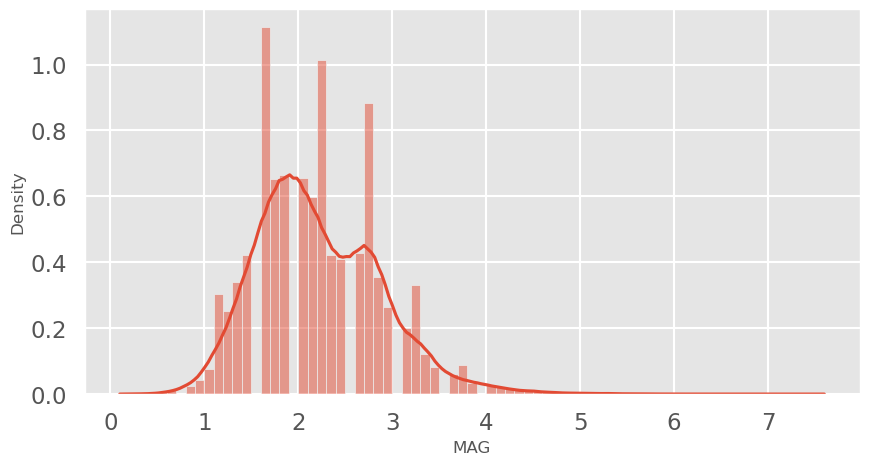

In [25]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='MAG', stat='density', binwidth=.1, kde=True)
plt.show()


This plot displays the density distribution of earthquake magnitudes recorded since 2005. The majority of earthquakes fall within the normal distribution range of 1 to 4, suggesting that only a few earthquakes are of significant strength. The distribution curve provides valuable insights into the frequency and severity of earthquakes in the region surrounding Turkey.

**Density Distribution of Earthquake Depth**

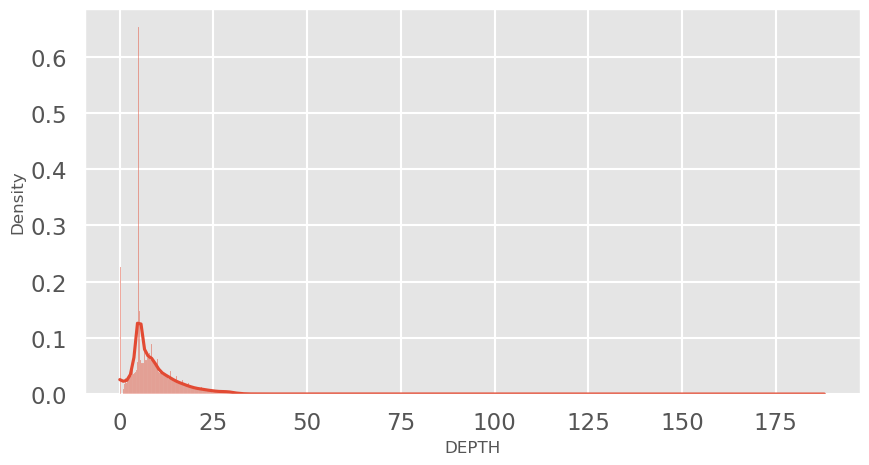

In [26]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='DEPTH', stat='density', kde=True)
plt.show()

This plot depicts the density distribution of earthquake depths recorded since 2005. It is noticeably right-skewed, signifying that the majority of earthquakes occur at shallow depths, with only a few happening at greater depths. The plot highlights that the majority of earthquakes are concentrated within the first 25 kilometres of the Earth's crust. Through the distribution curve, we gain insights into the spatial and temporal patterns of earthquakes in the vicinity of Turkey

**Relationship b/w Magnitude and Depth**

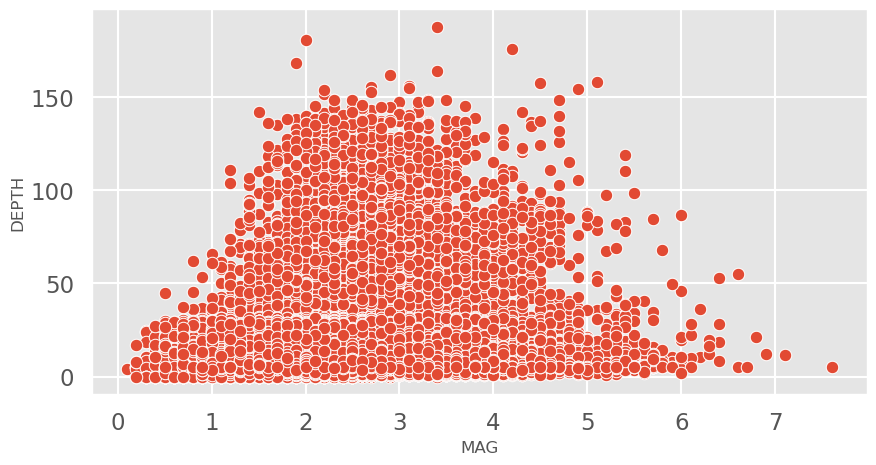

In [27]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='MAG', y='DEPTH')
plt.show()


This scatter plot depicts the connection between earthquake magnitude and depth for earthquakes occurring since 2005. The plot suggests that there is no evident correlation between magnitude and depth, although a trend emerges where higher-magnitude earthquakes tend to be located at shallower depths. It is apparent from the plot that the majority of earthquakes fall into the category of low magnitudes and shallow depths, with only a few being strong and occurring at greater depths. Overall, this plot provides valuable insights into the distribution of earthquakes concerning their magnitude and depth.

**How many earthquakes did occur between 2005 and 2023?**

In [28]:
import plotly.express as ex
tmp = df.groupby(by='year').count()
tmp = tmp.reset_index()[['year','date']]
tmp
fig = ex.line(tmp,x='year',y='date')
fig.update_layout(
    title= 'Number Of Earthquakes Over The Years 2005-2023',
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 0.0,
        dtick = 1
    )
)
fig.add_shape(type="line",
    x0=tmp['year'].values[0], y0=tmp['date'].mean(), x1=tmp['year'].values[-1], y1=tmp['date'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean'
)
fig.show()

From 2006 until the last few years, there has been an average climbing trend in the total earthquake events per year. We see that in the last 3 years in our dataset, there has been a sudden drop in our trend

**The mean of Magnitude**

In [29]:
tmp = df.groupby(by='year').mean()
tmp = tmp.reset_index()[['year','MAG']]
tmp
fig = ex.line(tmp,x='year',y='MAG')
fig.update_layout(
    title= 'Mean Earthquakes Magnitude Over The Years 2005-2023',
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 0.0,
        dtick = 1
    )
)
fig.show()

We see that in 2005 we had a very high mean magnitude of earthquakes in compression to later years. The mean magnitude value decreased between 2006 and 2014. After 2014, the value stayed around the same and then decreased in the following years. In 2022, the mean magnitude value increased.

**Distribution Longitude**

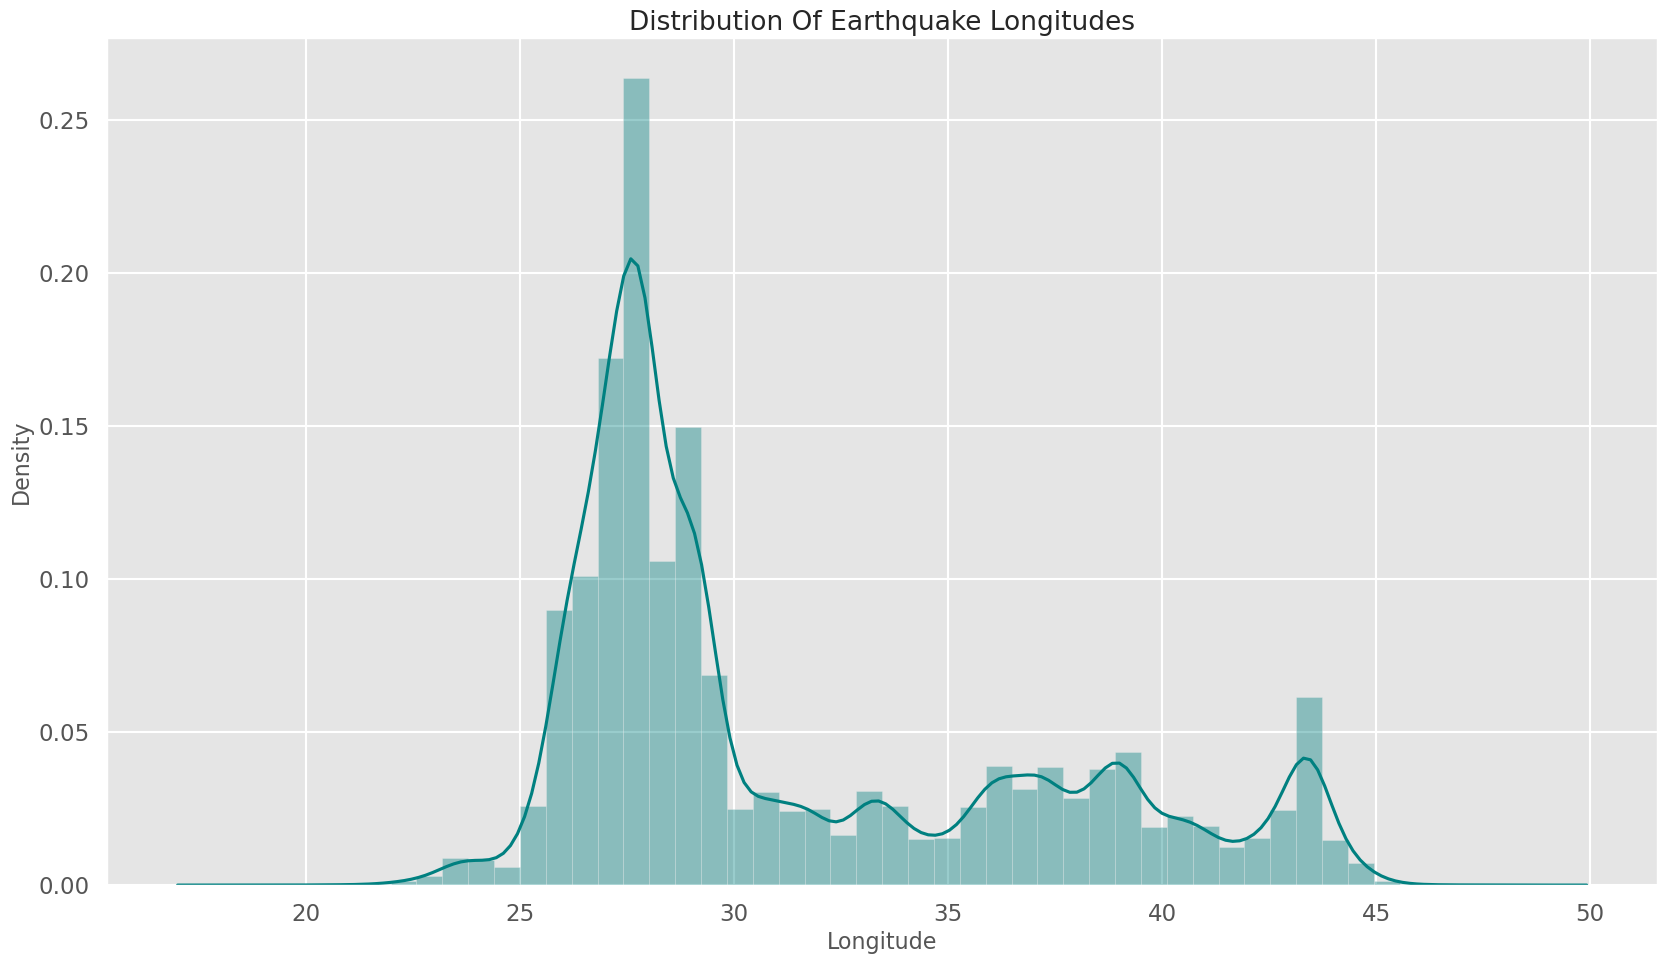

In [30]:
plt.figure(figsize=(20,11))
ax = sns.distplot(df['LNG'],label='Longitude',color='teal')
ax.set_title('Distribution Of Earthquake Longitudes',fontsize=19)
ax.set_ylabel('Density',fontsize=16)
ax.set_xlabel('Longitude',fontsize=16)

plt.show()

We see that our dataset's longitude follows a multimodal distribution to be precise; We assume that we can use clustering to cluster the 3 different groups of longitude and try and understand why those clusters have similar longitude and what unites those clusters.

**Distribution Lantitude**

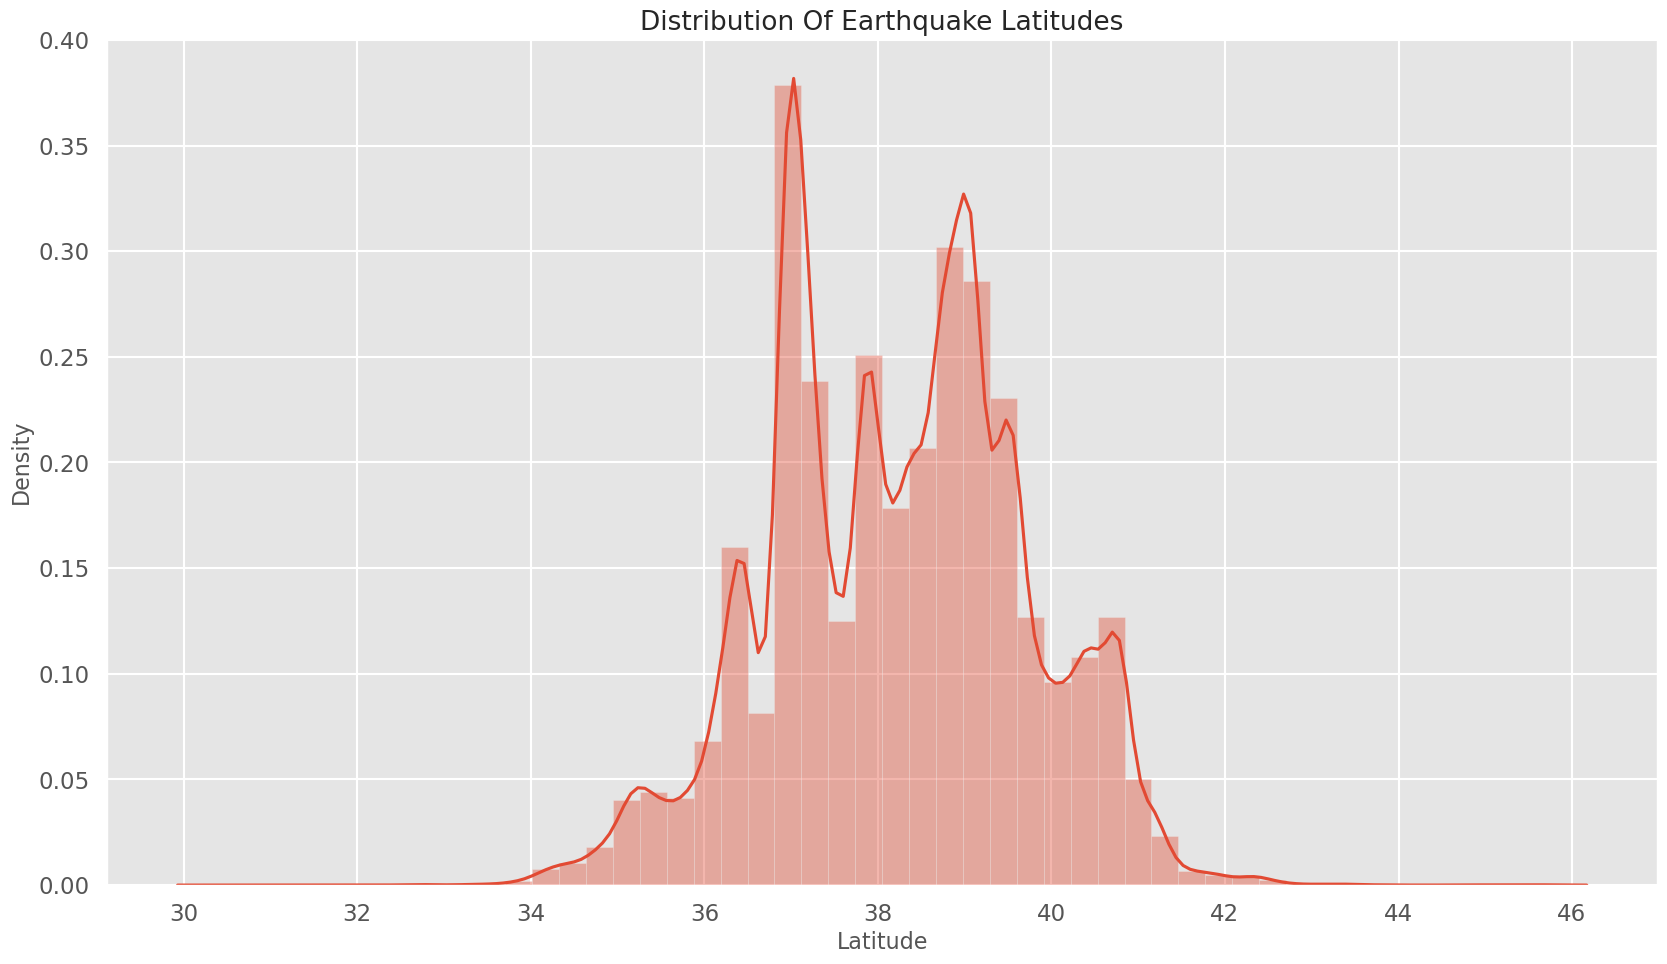

In [31]:
plt.figure(figsize=(20,11))
ax = sns.distplot(df['LAT'],label='Latitude')
ax.set_title('Distribution Of Earthquake Latitudes',fontsize=19)
ax.set_ylabel('Density',fontsize=16)
ax.set_xlabel('Latitude',fontsize=16)

plt.show()

The altitude, like the longitude, exhibits a multimodal distribution. We plan to conduct clustering on these features in a subsequent phase of this analysis, with the hope of gaining insights into distinct groups of earthquake sites.

**Magnitude of Box Plot**

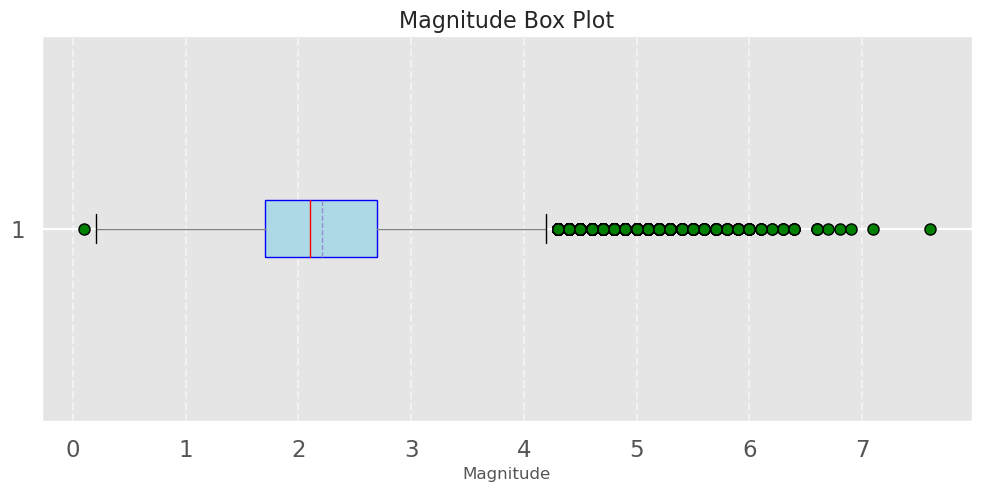

In [32]:
fig, ax = plt.subplots(figsize=(12, 5))

plt.boxplot(df['MAG'], vert=False, showmeans=True, meanline=True, 
            patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'), whiskerprops=dict(color='gray'),
            capprops=dict(color='black'), flierprops=dict(marker='o', markerfacecolor='green', markersize=8))

plt.title("Magnitude Box Plot", fontsize=16)
plt.xlabel("Magnitude", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

When we look at the box plot, we can see outliers (green dots). Outliers can have a disproportionate impact on statistical analysis and modelling techniques. They can skew the results, affect the accuracy of descriptive statistics (e.g., mean and standard deviation), and influence the performance of predictive models.  Therefore, we will look at how many outliers in our dataset.

In [33]:
def find_outliers(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

outliers = find_outliers(df['MAG'])

print('The number of outliers: '+ str(len(outliers)))

print('Max outlier value: '+ str(outliers.max()))

print('Min outlier value: ' + str(outliers.min()))

The number of outliers: 1802
Max outlier value: 7.599999999999999
Min outlier value: 0.1


There are 1082 outliers in magnitude feature. Min and max values are 0.1 and 7.59 respectively.

**According to years, what is the highest Magnitute in dataset?**

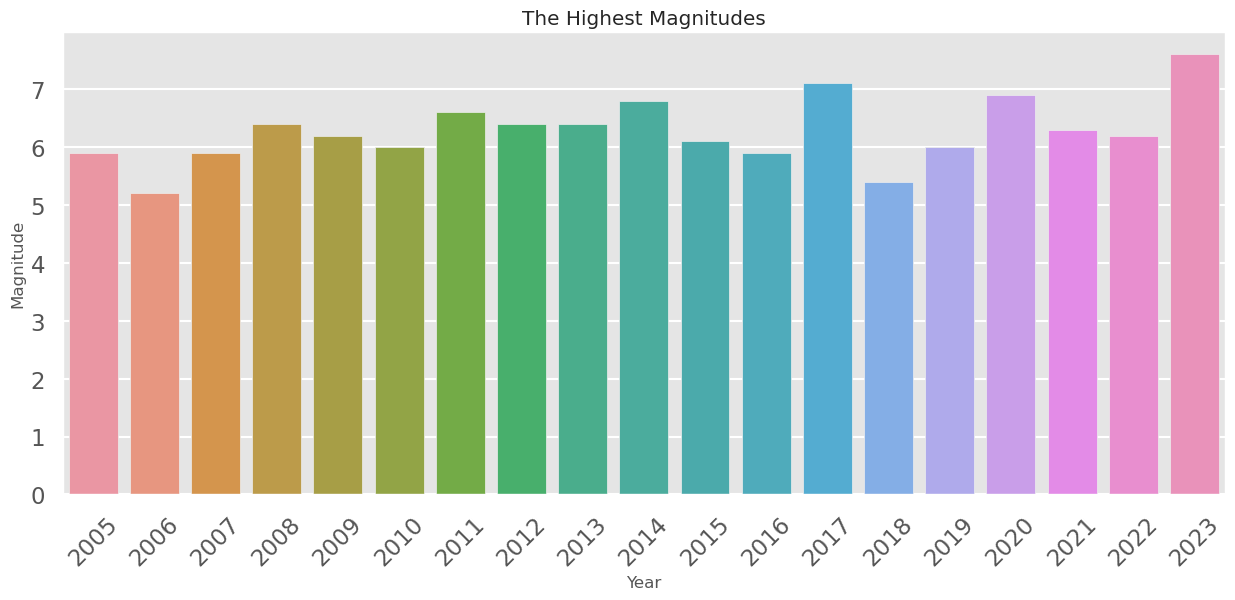

In [34]:
max_yearly_mag=df.groupby('year').agg({'MAG': 'max'})['MAG'].nlargest(20)
plt.figure(figsize=(15, 6))
sns.barplot(x=max_yearly_mag.index, y=max_yearly_mag.values)
plt.xlabel('Year')
plt.ylabel('Magnitude')
plt.title('The Highest Magnitudes')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

We can see that earthquake has a 7.6 magnitude in 2023 and 7.1 magnitude in 2017.

**Which location has the highest earthquake magnitude in the dataset?**

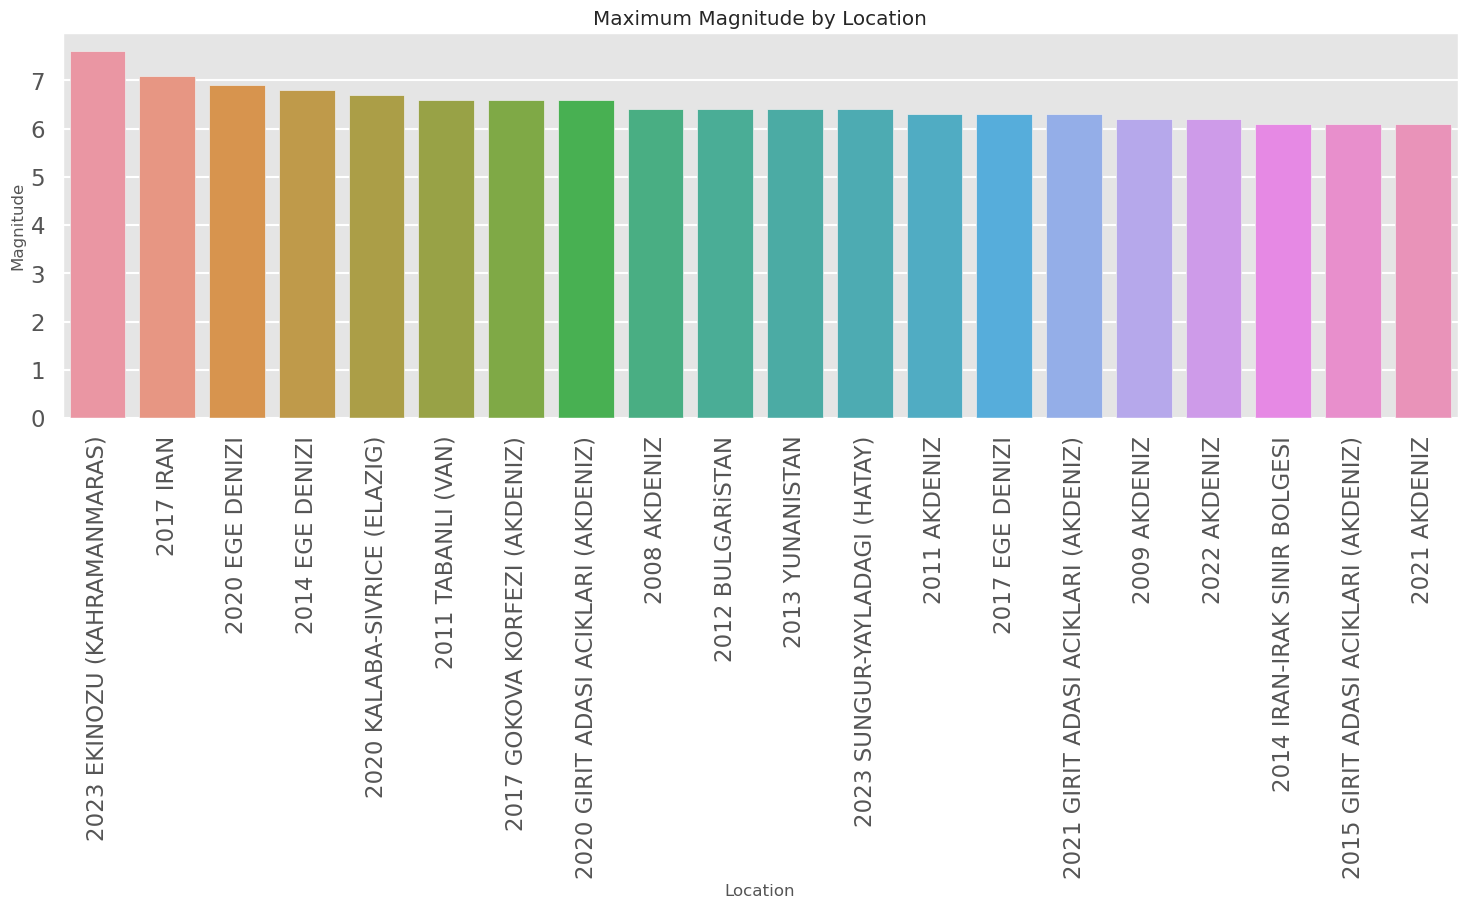

In [35]:
location_max_magnitude = df.groupby(['year','LOCATION_']).agg({'MAG': 'max'})['MAG'].nlargest(20)
location_max_magnitude=location_max_magnitude.reset_index()
plt.figure(figsize=(18, 5))  # Adjust the figure size if needed
location_max_magnitude['Year_Location'] = location_max_magnitude['year'].astype(str) + ' ' + location_max_magnitude['LOCATION_']
sns.barplot(x=location_max_magnitude['Year_Location'], y=location_max_magnitude['MAG'].values)
plt.xlabel('Location')
plt.ylabel('Magnitude')
plt.title('Maximum Magnitude by Location')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

In 2023, Ekinözü (Kahramanmaraş) has a 7.6 magnitude of earthquake. We know that this earthquake affects 11 cities.  In 2017, Iran has a 7.1 magnitude of earthquake. Iran is near the border with Turkey. For this reason, Earthquakes in neighbouring countries affected cities in Turkey close to those countries.

**Which month has had the most earthquakes in all and the last 4 years?**

* **Between 2005 and 2023**

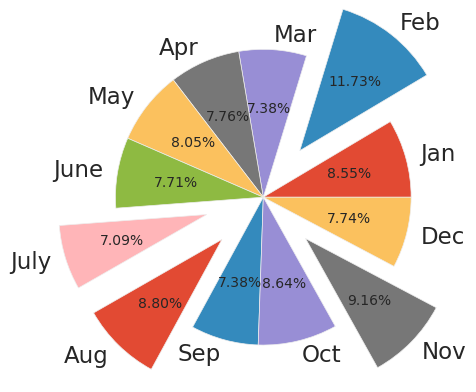

In [36]:
year_all= df.groupby(['month']).agg({'MAG': 'count'})['MAG']
labels = ["Jan","Feb","Mar","Apr","May","June","July","Aug","Sep","Oct","Nov","Dec"]
explode = [0,0.4,0,0,0,0,0.4,0.4,0,0,0.4,0]
fig1, ax1 = plt.subplots()
ax1.pie(year_all.values,autopct='%3.2f%%', labels = labels,explode=explode)

plt.show()

February, November and August have the most magnitude earthquakes. However, July has the lowest magnitude earthquakes.

#### **2020**

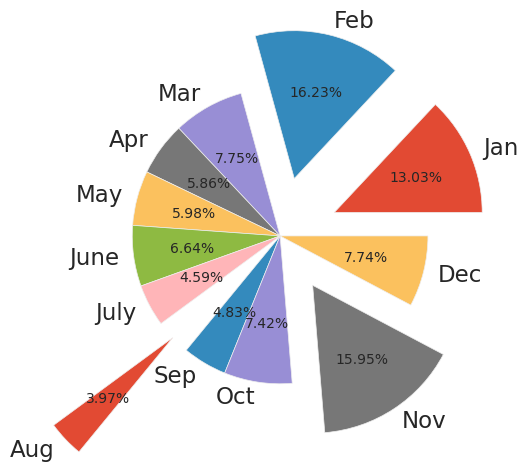

In [37]:
year_2020=df[df['year']==2020]
year_2020= year_2020.groupby(['month']).agg({'MAG': 'count'})['MAG']
labels = ["Jan","Feb","Mar","Apr","May","June","July","Aug","Sep","Oct","Nov","Dec"]
explode = [0.4,0.4,0,0,0,0,0,1,0,0,0.4,0]
fig1, ax1 = plt.subplots()
ax1.pie(year_2020.values,autopct='%3.2f%%', labels = labels,explode=explode)

plt.show()

In 2020, we can see clearly that February, November, and January have the most earthquakes in Turkey. August has the lowest number of earthquakes.

* **2021**

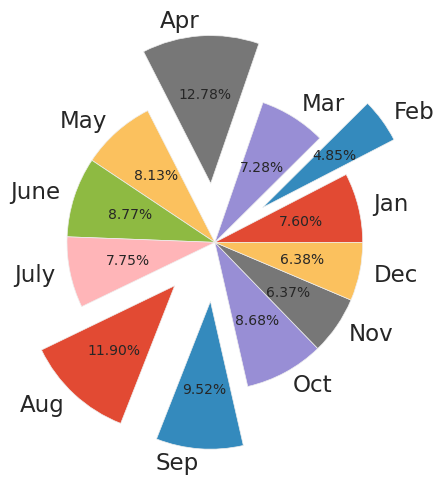

In [38]:
year_2021=df[df['year']==2021]
year_2021= year_2021.groupby(['month']).agg({'MAG': 'count'})['MAG']
labels = ["Jan","Feb","Mar","Apr","May","June","July","Aug","Sep","Oct","Nov","Dec"]
explode = [0,0.4,0,0.4,0,0,0,0.4,0.4,0,0,0]
fig1, ax1 = plt.subplots()
ax1.pie(year_2021.values,autopct='%1.2f%%', labels = labels,explode=explode)

plt.show()


April, August and September has the highest earthquakes in Turkey. 

* **2022**

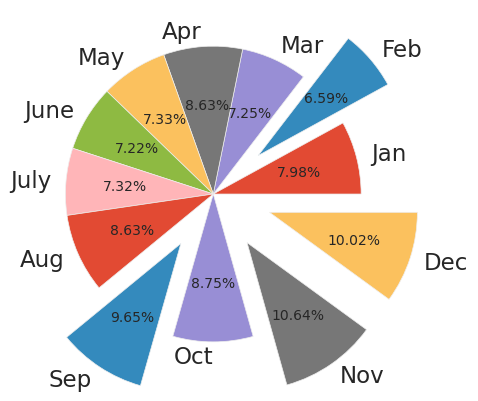

In [39]:
year_2022=df[df['year']==2022]
year_2022= year_2022.groupby(['month']).agg({'MAG': 'count'})['MAG']
labels = ["Jan","Feb","Mar","Apr","May","June","July","Aug","Sep","Oct","Nov","Dec"]
explode = [0,0.4,0,0,0,0,0,0,0.4,0,0.4,0.4]
fig1, ax1 = plt.subplots()
ax1.pie(year_2022.values,autopct='%1.2f%%', labels = labels,explode=explode)

plt.show()

In the above pie chart, November, December and September have the most earthquake in Turkey. February has the fewest earthquakes.

*  **2023**

In our dataset, it includes only January and February data. We know that 6 February 2023 has the most significant earthquake that lived in Turkey. The magnitude of the earthquake was 7.9 and 11 cities were affected by this disaster. We don't need to visualize the pie chart because February has the highest-magnitude earthquake.

In [40]:
df['DATE_'].max()

Timestamp('2023-02-27 14:54:02')

When we look at the above pie graphs, each year changes the number of earthquakes according to month. We can say obviously that there is no pattern visibly.  

**At what time do earthquakes occur the most?**

In [41]:
x=df.groupby('hour')[['MAG']].mean()
fig=px.line(x,x=x.index,y='MAG',title='Hourly Mean Magnitude',markers=True)
fig.show()

When we look at it generally, we can see clearly that most earthquakes are between 8 a.m. and 19 p.m. But these earthquakes can be small-scale earthquakes and they can increase the mean of size of earthquakes.

* When we analyze only between 2022 and 2023 years 

In [42]:
df1=df[df['year']>2021]
x=df1.groupby('hour')[['MAG']].max()
fig=px.line(x,x=x.index,y='MAG',title='Hourly Max Magnitude Between 2022 and 2023',markers=True)
fig.show()

The maximum earthquake hour is 13:00 and the magnitude of an earthquake is 7.6. Moreover, the most important hours are 4, 15 and 20. These hours had greater than 6 magnitudes of earthquakes.


**Which Season has the most Earthquake?**

This question is also crucial for us because of climate change. When the temperature increases,  it can occur by earthquakes. 

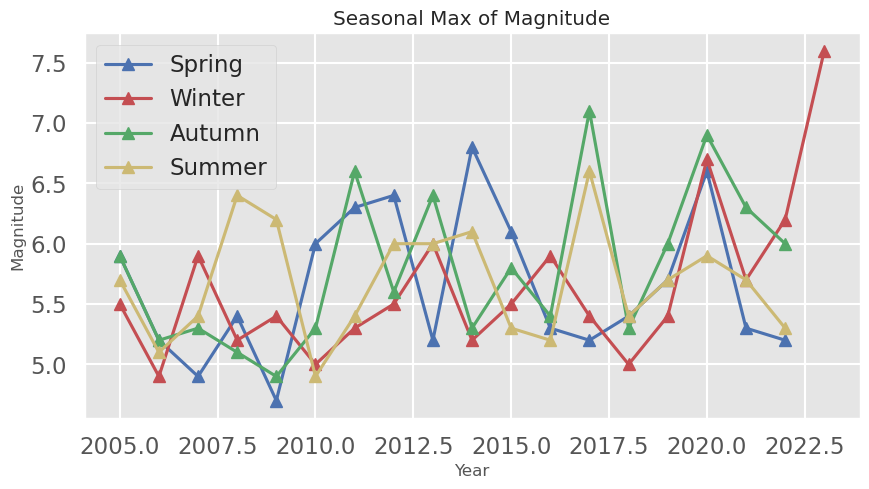

In [43]:
spring=df[(df['is_spring'] == True)]
winter=df[(df['is_winter'] == True)]
autumn=df[(df['is_autumn'] == True)]
summer=df[(df['is_summer'] == True)]
spring_mean=spring.groupby('year')[['MAG']].max()
winter_mean=winter.groupby('year')[['MAG']].max()
autumn_mean=autumn.groupby('year')[['MAG']].max()
summer_mean=summer.groupby('year')[['MAG']].max()
plt.figure(figsize=(10, 5))
ax = plt.gca()
plt.plot(spring_mean, marker='^', color='b', label='Spring')
plt.plot(winter_mean, marker='^', color='r', label='Winter')
plt.plot(autumn_mean, marker='^', color='g', label='Autumn')
plt.plot(summer_mean, marker='^', color='y', label='Summer')
plt.xlabel('Year')
plt.ylabel('Magnitude')
plt.title('Seasonal Max of Magnitude')
plt.legend()

# Show the plot


* In 2008, a Mediterranean earthquake occurred in **Summer** (yellow line in the graphic) and the magnitude of the earthquake was 6.4
 
* In 2011, the Van earthquake occurred in  **Autumn** (green line in the graphic) and the magnitude of the earthquake was 6.6.

* In 2013, Greece earthquake occurred in **Autumn**  and the magnitude of earthquake was 6.4

* In 2014, the Aegean Sea earthquake occurred in **Spring** (blue line in the graphic) and the magnitude of the Earthquake was 6.8

* In 2017, Iran Earthquake occurred in  **Autumn**  and some Turkish cities were affected by this earthquake. These cities are Diyarbakır,Bitlis, Mardin and Van. The magnitude of Earthquake is 7.1. 

* In 2020, the Aegean Sea Earthquake occurred in **Autumn** and the magnitude of the Earthquake was 6.9.

* In 2023, the Kahramanmaraş Earthquake occurred in **Winter** (red line in the graphic) and 11 cities were affected by this earthquake. Thousands of buildings were destroyed by this earthquake


Generally, we can say that the most of earthquakes are in Autumn. However, in 2023 it is a surprise that the winter earthquake the peak.

**Which day had the most earthquakes happen?**

In [44]:
tmp = df[['year','weekday']]
tmp=tmp.groupby(by='year').agg(lambda x:x.value_counts().index[0])
tmp = tmp.reset_index()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
            'Sunday']
days = {k:days[k] for k in range(0,7)}
tmp['weekday'] = tmp['weekday'].replace(days)
fig = px.pie(tmp,names='weekday',title='Propotion Of Earthquakes On A Certian Day Of Week Over The Years ')
fig.show()

A higher percentage of earthquakes were recorded on Mondays and Wednesdays

**Which city did the most earthquakes occur?**

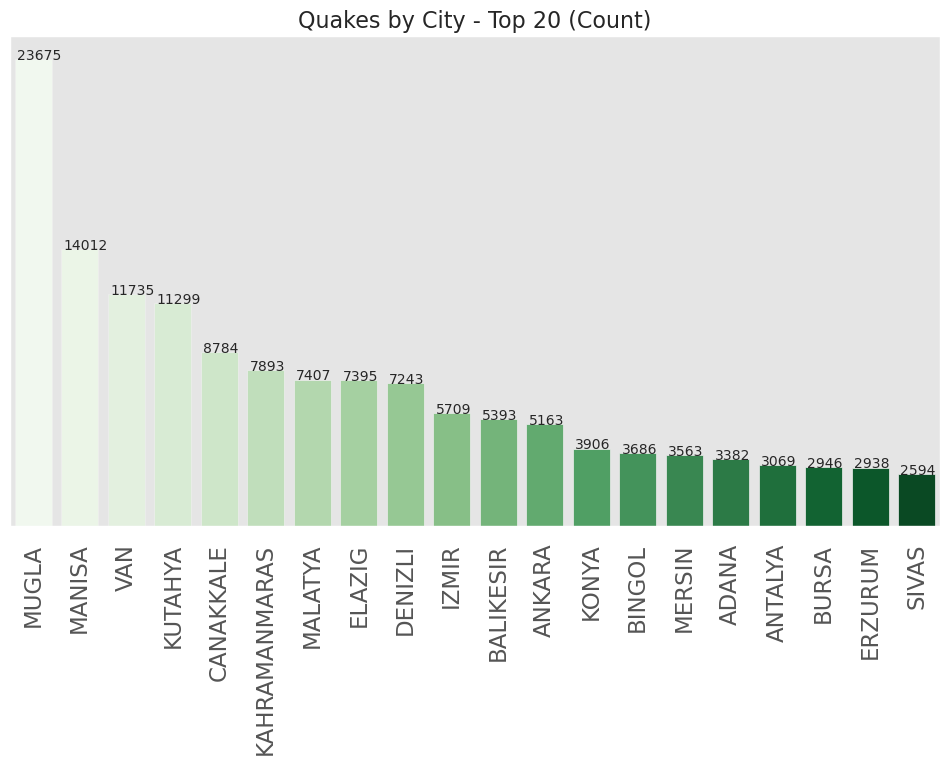

In [45]:
## Now We plot country-wise data with barplots for  top 20 citis

plt.subplots(figsize=(12,14))


plt.subplot(211)
plt.title('Quakes by City - Top 20 (Count)', fontsize=16)
new_df=[]
new_df=pd.DataFrame(new_df)
categories_to_exclude = ['Sea', 'Gulk', 'Region', 'Country', 'Lake', 'Hellespont', 'Border', 'Island']

# Create the new DataFrame by excluding specific categories
new_df = df[~df['Category'].isin(categories_to_exclude)].reset_index(drop=True)
ax = sns.countplot(x=new_df['Category'], palette='Greens', alpha=1, order=new_df['Category'].value_counts().head(20).index)

for p in ax.patches:
        
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+3))

plt.xticks(rotation=90), plt.xlabel(None), plt.ylabel(None), plt.yticks([])

plt.show()

Turkey has 81 provinces. One of these is Muğla province which has the most earthquakes compared to other provinces. 23675 earthquakes are recorded for this province. 

**Which region has the most earthquakes?**

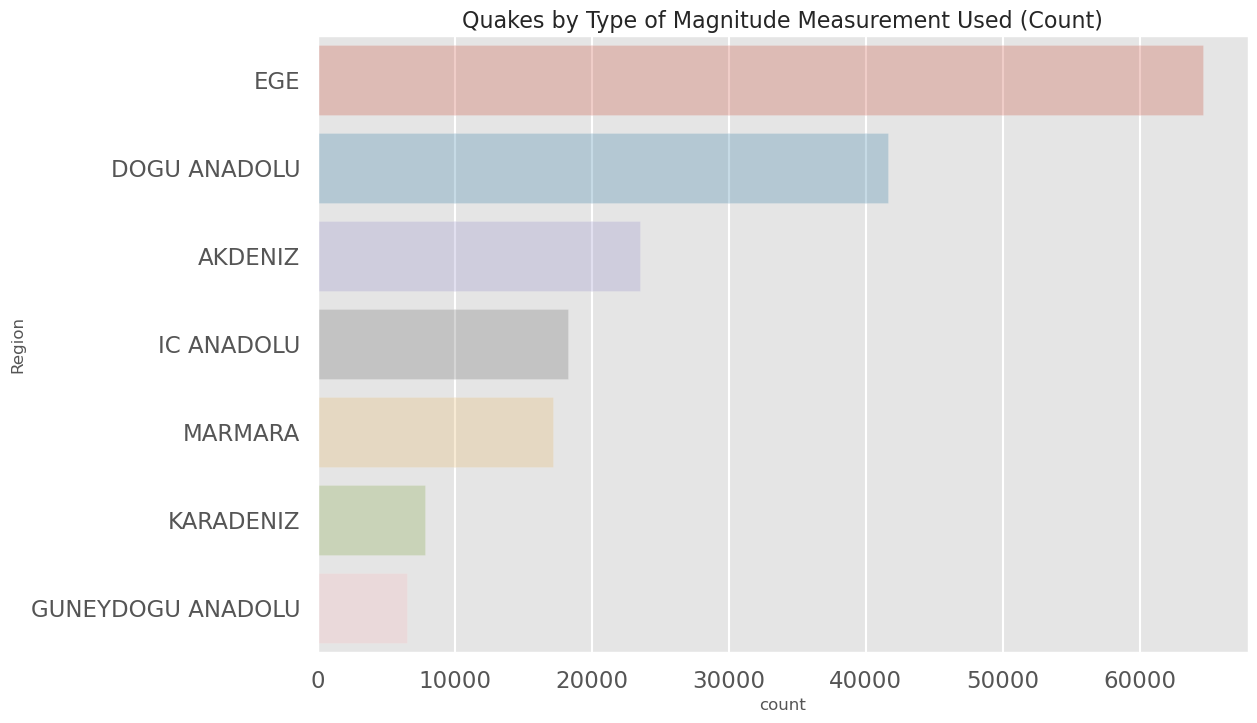

In [46]:
new_df=[]
plt.subplots(figsize=(12,8))
new_df=pd.DataFrame(new_df)
categories_to_exclude = ['Other']
new_df = df[~df['Region'].isin(categories_to_exclude)].reset_index(drop=True)
plt.title('Quakes by Type of Magnitude Measurement Used (Count)', fontsize=16)
ax = sns.countplot(y='Region', data=new_df, alpha=0.3, order=new_df['Region'].value_counts().index)

Turkey is divided into seven regions: Inner Anatolian, Marmara, Black Sea, Eastern Anatolia, Mediterranean, Aegean, and Southeastern Anatolia. These regions are named based on their geographical locations. For instance, the Aegean region, located in the western part of Turkey, includes cities such as Izmir, Manisa, Aydin, Usak, Kutahya, Afyon, Denizli, and Mugla. When we examine the bar plot representing earthquake data, it becomes evident that the Aegean Region has the highest number of recorded earthquakes. This may be attributed to the region's proximity to the Aegean Sea and Islands, which are considered as contributing factors to the occurrence of earthquakes in the area.

**What type of earthquake is Turkey most affected by?**

(([], []), Text(0, 0.5, ''), Text(0.5, 0, ''))

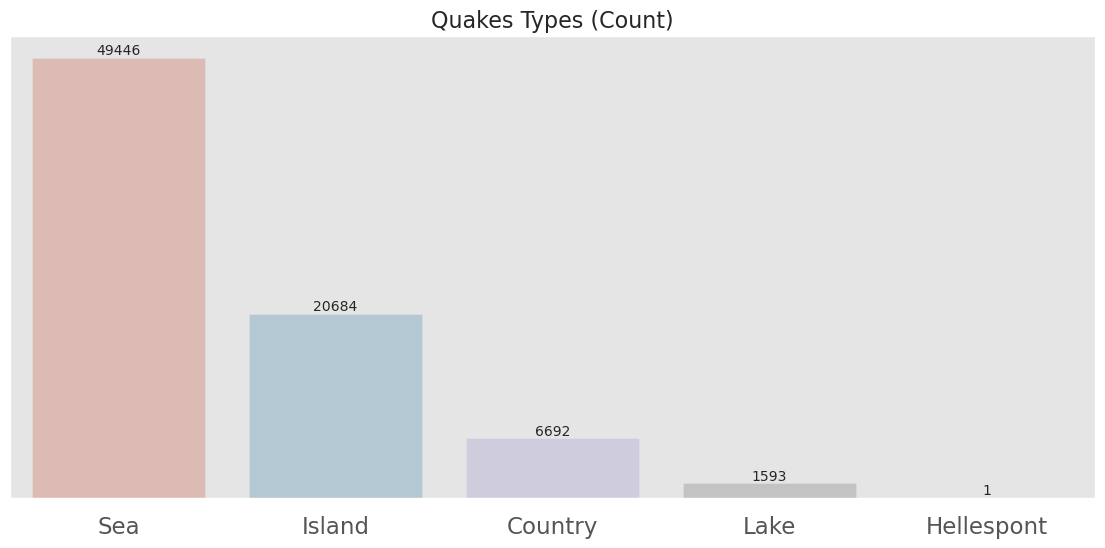

In [47]:
def categorize_city(category):
    if category in categories_to_include:
        return category
    else:
        return 'Other'
plt.subplots(figsize=(14,6))    
categories_to_include = ['Sea', 'Gulk', 'Region', 'Country', 'Lake', 'Hellespont', 'Border', 'Island']
df['Types'] = df.apply(lambda row: categorize_city(row['Category']), axis=1)
categories_to_exclude = ['Other','Region']
new_df=[]
new_df=pd.DataFrame(new_df)
new_df = df[~df['Types'].isin(categories_to_exclude)].reset_index(drop=True)

plt.title('Quakes Types (Count)', fontsize=16)
ax = sns.countplot(x="Types", data=new_df, alpha=0.3, order=new_df['Types'].value_counts().head(10).index)
for p in ax.patches: 
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ p.get_width()/2, p.get_height() + 5), ha='center', va='bottom')
plt.yticks([]), plt.ylabel(None), plt.xlabel(None)

We see that the cause of most earthquakes in Turkey is the sea then it follows the region and islands. 

**Which sea affects the earthquake in Turkey the most?**

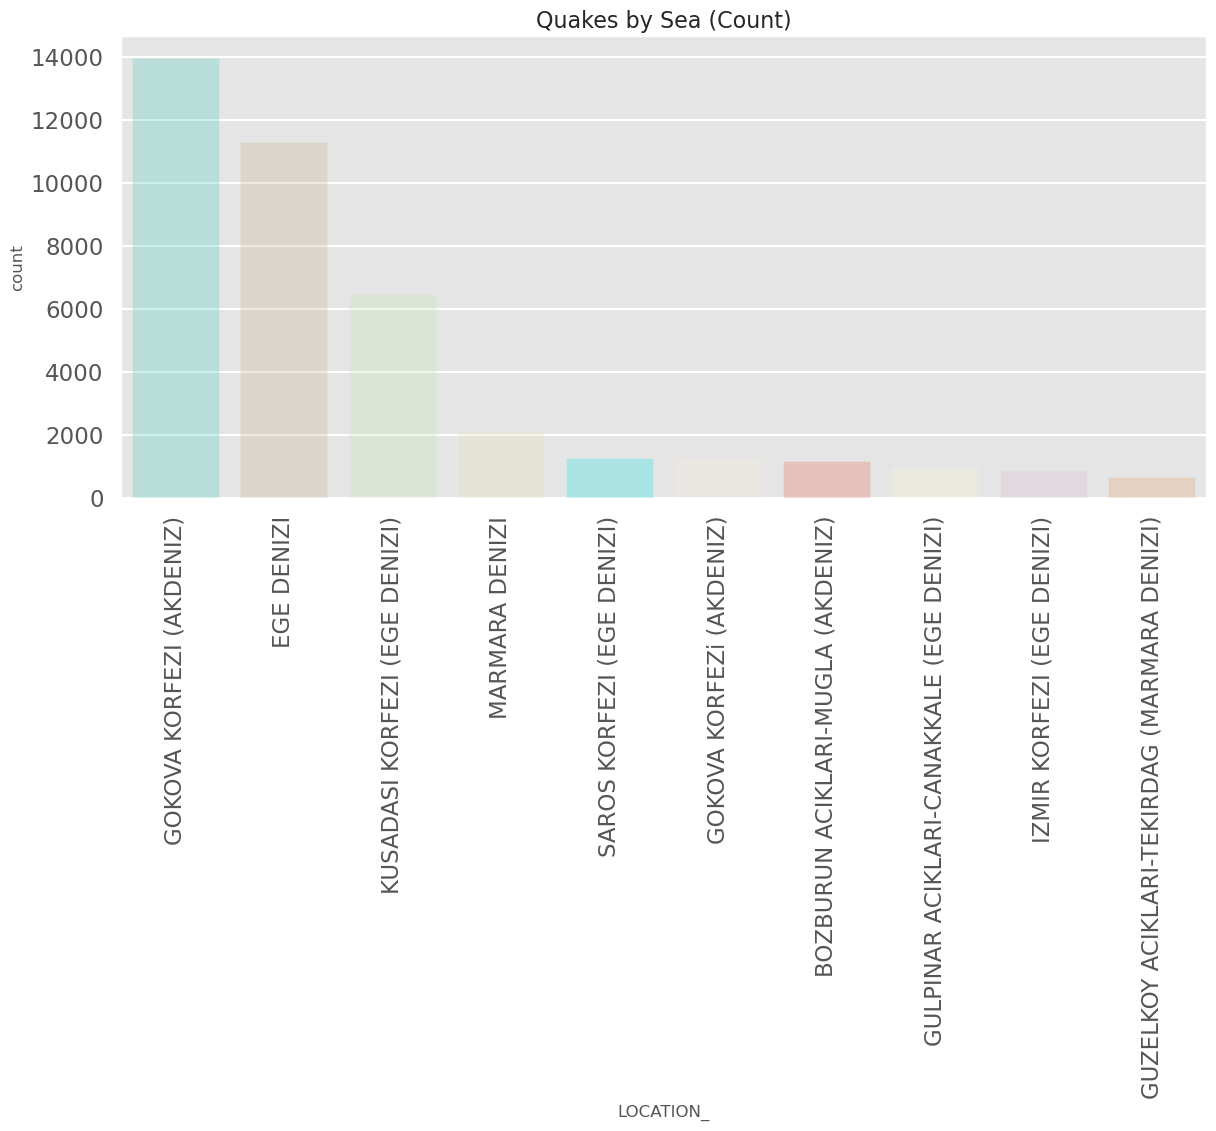

In [48]:
new_df1=new_df[new_df['Types']=='Sea']
new_df1['LOCATION_'].value_counts().unique
new_df1['LOCATION_'] = new_df1['LOCATION_'].str.replace('DENiZi', 'DENIZI')
plt.subplots(figsize=(14,6)) 
my_col = ('#40E0D0', '#D2B48C','#c7e9b4', '#EEE8AA','#00FFFF','#FAEBD7','#FF6347', '#FAFAD2', '#D8BFD8','#F4A460','#F08080', '#EE82EE', '#4682B4','#6A5ACD', '#00C78C')

plt.title('Quakes by Sea (Count)', fontsize=16)
ax = sns.countplot(x="LOCATION_", data=new_df1, palette=my_col, alpha=0.3, order=new_df1['LOCATION_'].value_counts().head(10).index)

plt.xticks(rotation=90)

plt.show()

The highest intensity of the earthquake is the Gulf of Gökova. Many earthquakes have occurred here throughout history. The Aegean Sea is the sea with the most earthquakes.

**Which country has the most significant role in Turkey's Earthquake?**

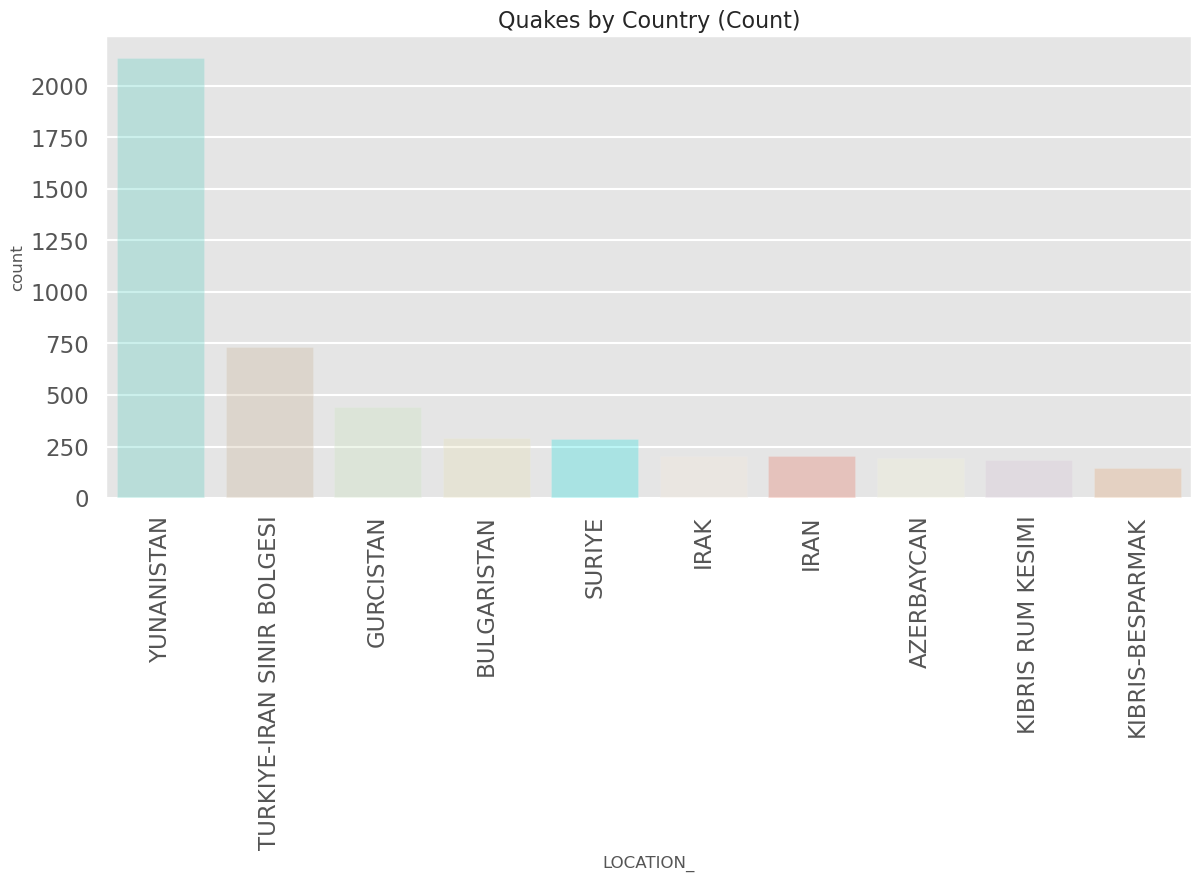

In [49]:
new_df2=new_df[new_df['Types']=='Country']
new_df2['LOCATION_'].value_counts().unique
new_df2['LOCATION_'] = new_df2['LOCATION_'].str.replace('AKDENiZ', 'AKDENIZ')
new_df2['LOCATION_'] = new_df2['LOCATION_'].str.replace('ONiKi', 'ONIKI')
plt.subplots(figsize=(14,6)) 
my_col = ('#40E0D0', '#D2B48C','#c7e9b4', '#EEE8AA','#00FFFF','#FAEBD7','#FF6347', '#FAFAD2', '#D8BFD8','#F4A460','#F08080', '#EE82EE', '#4682B4','#6A5ACD', '#00C78C')

plt.title('Quakes by Country (Count)', fontsize=16)
ax = sns.countplot(x="LOCATION_", data=new_df2, palette=my_col, alpha=0.3, order=new_df2['LOCATION_'].value_counts().head(10).index)

plt.xticks(rotation=90)

plt.show()

In the graph, the most earthquakes are in Yunanistan. Yunanistan place north west of Turkey and it is near the neighbour of Turkey. For this reason, Yunanistan is the most effective country for quakes. Also, the Turkey and Iran border region has taken many earthquakes.

**Which Island has the most earthquakes?**

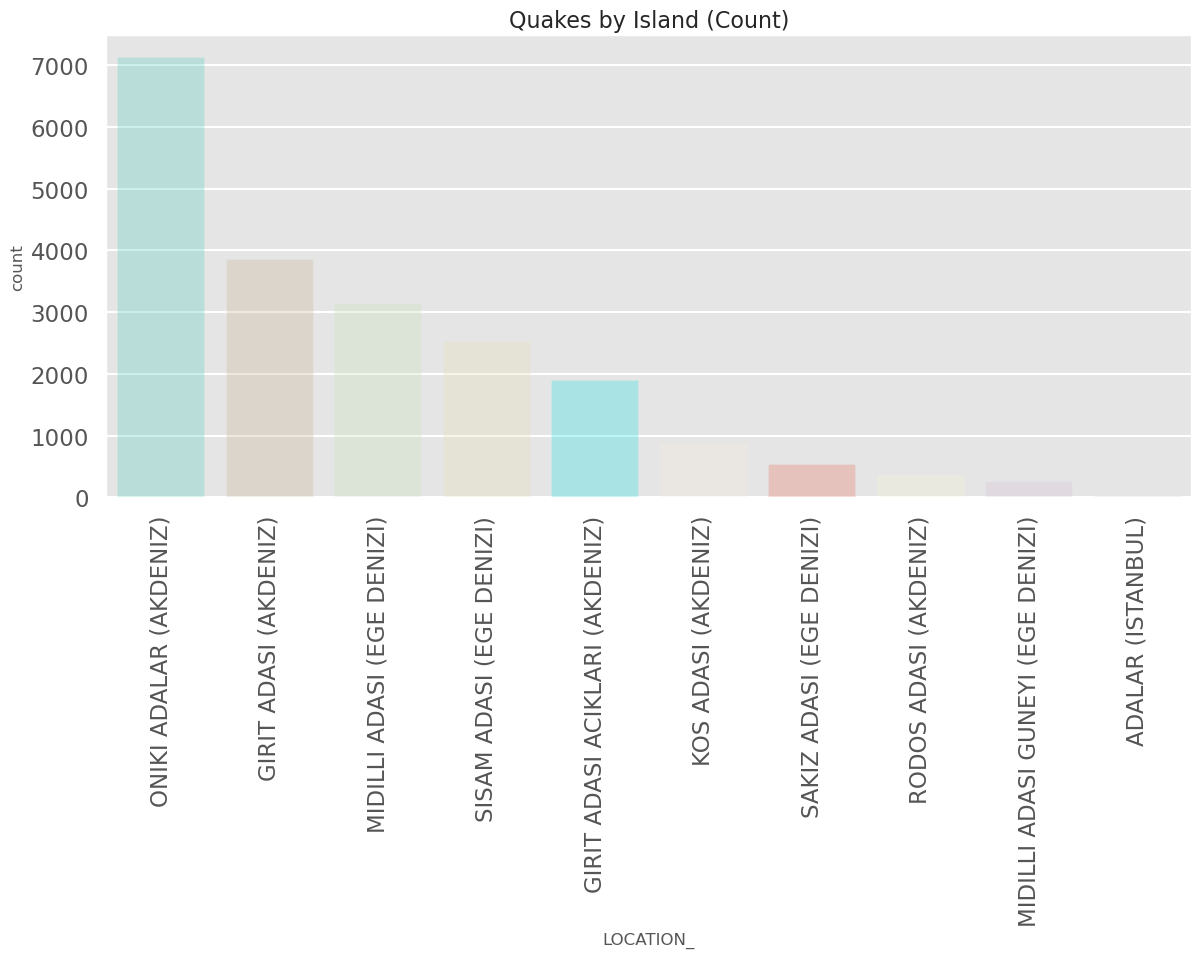

In [50]:
new_df1=new_df[new_df['Types']=='Island']
new_df1['LOCATION_'].value_counts().unique
new_df1['LOCATION_'] = new_df1['LOCATION_'].str.replace('DENiZi', 'DENIZI')
plt.subplots(figsize=(14,6)) 
my_col = ('#40E0D0', '#D2B48C','#c7e9b4', '#EEE8AA','#00FFFF','#FAEBD7','#FF6347', '#FAFAD2', '#D8BFD8','#F4A460','#F08080', '#EE82EE', '#4682B4','#6A5ACD', '#00C78C')

plt.title('Quakes by Island (Count)', fontsize=16)
ax = sns.countplot(x="LOCATION_", data=new_df1, palette=my_col, alpha=0.3, order=new_df1['LOCATION_'].value_counts().head(10).index)

plt.xticks(rotation=90)

plt.show()

In the bar graph, we can see clearly that the highest earthquakes are in On Iki Island which is available in the south Aegean region. Any earthquake that happens there affects Turkey. Girit, midilli, sisam Islands are in the Aegean coast of the Turkey. They play an active role in earthquakes happened

## A Closer Study of Muğla

**In which year did most earthquakes occur in Mugla?**

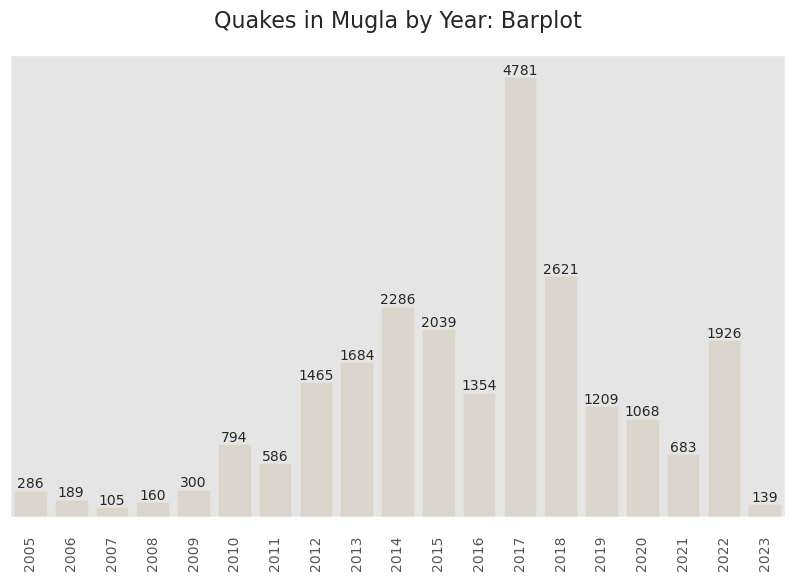

In [51]:
## Now We plot country-wise data with barplots for  top 20 citis
import squarify
my_col = ('#40E0D0', '#D2B48C','#c7e9b4', '#EEE8AA','#00FFFF','#FAEBD7','#FF6347', '#FAFAD2', '#D8BFD8','#F4A460','#F08080', '#EE82EE', '#4682B4','#6A5ACD', '#00C78C')


plt.subplots(figsize=(10,6))
new_df=[]
new_df=pd.DataFrame(new_df)
categories_to_exclude = ['Sea', 'Gulk', 'Region', 'Country', 'Lake', 'Hellespont', 'Border', 'Island']

# Create the new DataFrame by excluding specific categories
new_df = df[~df['Category'].isin(categories_to_exclude)].reset_index(drop=True)


plt.title('Quakes in Mugla by Year: Barplot', pad=20, fontsize=16)
ax = sns.countplot(x='year', data=new_df[new_df['Category'] == "MUGLA"], color='#D2B48C', alpha=0.3)

for p in ax.patches: 
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ p.get_width()/2, p.get_height() + 0.1), ha='center', va='bottom')
plt.ylabel(None), plt.yticks([]), plt.xticks(fontsize=10, rotation=90), plt.xlabel(None)


plt.show()

The most earthquakes are in the year 2017 

**According to Latitude and Longitude, How is the distribution of earthquakes in Muğla?**

In [52]:
new_df=[]
new_df=pd.DataFrame(new_df)
categories_to_exclude = ['Sea', 'Gulk', 'Region', 'Country', 'Lake', 'Hellespont', 'Border', 'Island']

# Create the new DataFrame by excluding specific categories
new_df = df[~df['Category'].isin(categories_to_exclude)].reset_index(drop=True)

fig = px.density_mapbox(new_df[new_df['Category'] == "MUGLA"], lat='LAT', lon='LNG', z='MAG', radius=10,
                        center=dict(lat=37.215374, lon=28.363394), zoom=6.5, title = "Quakes in MUGLA by Latitude & Longitude")
fig.update_layout(mapbox_style="stamen-terrain", title_font_size=16, title_x=0.5)
fig.show()

In above map shows quakes of Mugla according to latitude and longitude. The yellow region shows the highest magnitude earthquakes. It is also useful to remind that this map includes all earthquakes between 2005 and 2023. For this reason, the map is yellow density

**Which district has the most earthquakes in Muğla?**

In [53]:
mugla_df=df[df['Category']=='MUGLA']

In [54]:
mugla_df['district']=None

In [55]:
def extract_distict(location):

    if '-' in location:
            city, _, province = location.partition('-')
            city = city.strip()
            province = province.replace('-', '').strip()
            return province
    else:
            return location
  

for i in range(0,len(mugla_df)):       
    mugla_df['district'].iloc[i]=extract_distict(mugla_df['Provience'].iloc[i])

Text(0, 0.5, 'Count of Magnitude ')

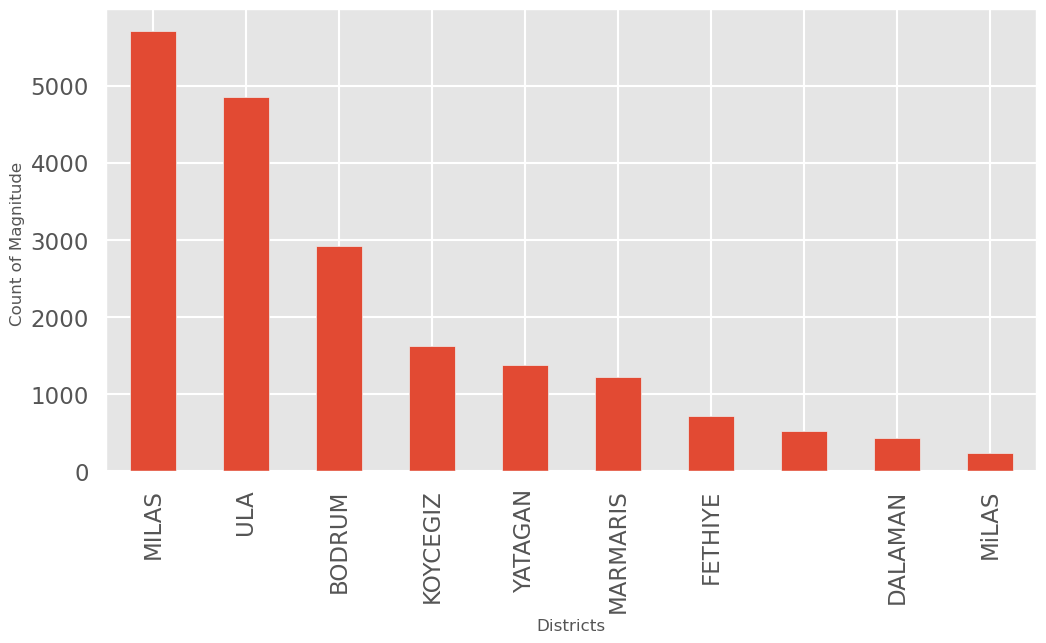

In [56]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
categories_to_exclude=['(MUGLA)','MUGLA']
mugla_df1 = mugla_df[~mugla_df['district'].isin(categories_to_exclude)].reset_index(drop=True)
mugla_df1.groupby('district').agg({'MAG': 'count'})['MAG'].nlargest(10).plot.bar()
plt.xlabel('Districts')
plt.ylabel('Count of Magnitude ')

Above graph show the count of magnitude for districts of Mugla. Most earthquakes are in MILAS which is the district of MUGLA. ULA,BODRUM,KOYCEGIZ, YATAGAN and MARMARIS has the highest rate of earthquake.

# Visualization of Turkey Earthquakes  Geographically

We will analyze the data set after 2022 year so we use filter method for dataframe.

In [57]:
df_2023=df[df['year']>2021]

Within the GitHub repository owned by [uyasarkocal,](https://github.com/uyasarkocal/borders-of-turkey) there are three GeoJSON files available. These files contain geographical data representing Turkey's borders at different hierarchical levels: country, district, and city. Using these files can provide valuable geographic context to the data.

In [58]:
import geopandas as gpd
url1 = 'https://raw.githubusercontent.com/uyasarkocal/borders-of-turkey/master/lvl0-TR.geojson'
url2 = 'https://raw.githubusercontent.com/uyasarkocal/borders-of-turkey/master/lvl1-TR.geojson'

border0 = gpd.read_file(url1)
border1 = gpd.read_file(url2)

The code fetches tectonic plate data from a GitHub repository and filters the plates based on the bounding box of earthquake data

In [59]:
plates = 'https://raw.githubusercontent.com/fraxen/tectonicplates/master/GeoJSON/PB2002_plates.json'
all_plates = gpd.read_file(plates)
gdf=gpd.GeoDataFrame(df_2023, geometry=gpd.points_from_xy(df_2023['LNG'], df_2023['LAT']))
plates = all_plates.cx[gdf.total_bounds[0]:gdf.total_bounds[2], gdf.total_bounds[1]:gdf.total_bounds[3]]

The below code snippet uses contextual and matplotlib to create a map plot showing earthquake data over Turkey's country borders using GeoPandas. 

**What is the distribution of earthquakes in 2022–2023?**

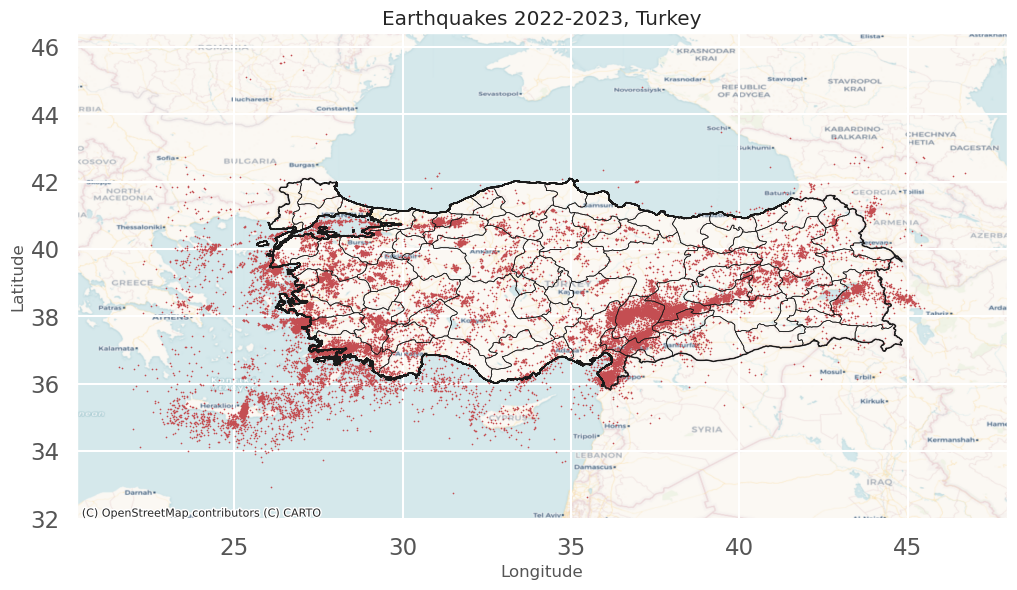

In [60]:
import contextily
# Plot data over the Turkey country border
fig, ax = plt.subplots(1, figsize=(12,12))
gdf.plot(ax=ax, markersize=0.5, color='r')
border0.plot(ax=ax, color='None', edgecolor='k', linewidth=1)
border1.plot(ax=ax, color='None', edgecolor='k', linewidth=0.5)

# Also use contextily to add a basemap for additional geographic context
contextily.add_basemap(ax=ax, crs='epsg:4326',source=contextily.providers.CartoDB.Voyager)

plt.title('Earthquakes 2022-2023, Turkey')
plt.grid(True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

The visualization depicts earthquakes that took place from 2022 to 2023. The red dots on the map indicate the locations of these earthquakes. A substantial number of earthquakes are concentrated in both the eastern and western regions of Turkey.

**What is the relationship between Tectonic plates and earthquakes?**

In [61]:
plates = 'https://raw.githubusercontent.com/fraxen/tectonicplates/master/GeoJSON/PB2002_plates.json'
all_plates = gpd.read_file(plates)

# This dataset covers the whole earth. Let's filter it with the bounding box of the
# earthquake data
plates = all_plates.cx[gdf.total_bounds[0]:gdf.total_bounds[2], gdf.total_bounds[1]:gdf.total_bounds[3]]

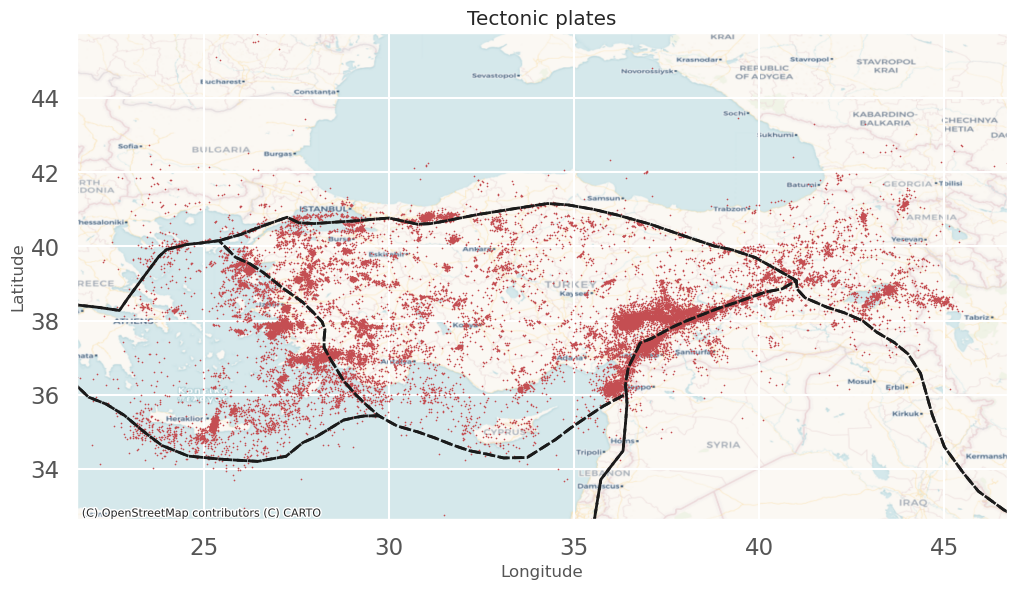

In [62]:
fig, ax = plt.subplots(1, figsize=(12,12))

gdf.plot(ax=ax, markersize=0.5, color='r')
plates.plot(ax=ax, color='None', edgecolor='k', linewidth=2, linestyle='--')

# Restrict plot to bounds of dataset
ax.set_xlim(gdf.total_bounds[0], gdf.total_bounds[2])
ax.set_ylim(gdf.total_bounds[1], gdf.total_bounds[3])

contextily.add_basemap(ax=ax, crs='epsg:4326',source=contextily.providers.CartoDB.Voyager)
plt.title('Tectonic plates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


The map illustrates the tectonic plates associated with Turkey. Tectonic plates and earthquakes are closely interconnected through the Earth's dynamic geological processes. Turkey is located in a seismically active region known for its complex tectonic interactions. It encompasses four tectonic plates positioned on the Anatolian Plate, which resides along the boundary of stress between the Arabian and Eurasian Plates.

# Clustering using DBSCAN

Clustering analysis strives to group data or objects relevant to the research question by organizing them according to their similarities. Each resulting cluster comprises objects with high degrees of similarity within the cluster itself while being less similar to data in other clusters. The effectiveness of a clustering method is determined by its adherence to this principle. Furthermore, the choice of a clustering approach depends on the specific subject matter and the intended objectives of the applications.


DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. It is a popular clustering algorithm used in machine learning and data mining for grouping together points that are closely packed in high-density regions while identifying outliers as noise. DBSCAN does not require specifying the number of clusters beforehand, making it advantageous over traditional clustering methods like k-means, which require the number of clusters as an input.

**Visualization Based on Location**

We are exclusively interested in data from the year 2022 onward. To achieve this, we utilize a filtering approach to extract all data that corresponds to the year 2023.

In [63]:
new_df=df[df['year']>2022]

Calculate the maximum and minimum latitude and longitude values in the DataFrame and then increment the maximum value by 1 and decrement the minimum value by 1.
The purpose of increasing or decreasing latitude and longitude values by 1 is that create a margin around the existing data points.

In [64]:
max_lat = new_df['LAT'].max()
max_lat = max_lat + 1
min_lat = new_df['LAT'].min()
min_lat = min_lat - 1

max_lon = new_df['LNG'].max()
max_lon = max_lon + 1
min_lon = new_df['LNG'].min()
min_lon = min_lon - 1

new_df = new_df[(new_df['LNG'] > min_lon) & (new_df['LNG'] < max_lon) & (new_df['LAT'] > min_lat) &(new_df['LAT'] < max_lat)]

We will use the Basemap class from the Basemap module in the matplotlib library to create a map with a specified geographical extent.
* **projection** : 'merc': The chosen map projection is Mercator.
* **resolution** : The map resolution is set to high.
* **area_thresh** : Specifies the threshold area below which features (like lakes and rivers) will not be drawn.
* **llcrnrlon**: Specifies the minimum longitude of the lower left corner of the map.
* **llcrnrlat** : Specifies the minimum latitude of the lower left corner of the map.
* **urcrnrlon** : Specifies the maximum longitude of the upper right corner of the map.
* **urcrnrlat**: Specifies the maximum latitude of the upper right corner of the map.

These parameters define the extent and characteristics of the map that will be created.

In [65]:
my_map = Basemap(projection='merc',
            resolution = 'h', area_thresh = 100.0,
            llcrnrlon=min_lon, llcrnrlat=min_lat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=max_lon, urcrnrlat=max_lat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

In [66]:
xs,ys = my_map(np.asarray(new_df.LNG), np.asarray(new_df.LAT))
new_df['xm']= xs.tolist()
new_df['ym'] =ys.tolist()

Now, we will visualize the location of Turkey using latitude and longitude 

* **my_map.drawcoastlines()** : adding coastlines to the map, drawing the outlines of landmasses that border the ocean.

* **my_map.drawcountries()** :  adding country boundaries to the map, drawing the outlines of countries.

* **my_map.fillcontinents(color='white', alpha=0.3)**:  filling the continents with a white color and an alpha transparency of 0.3, making the land areas slightly transparent.

* **my_map.shadedrelief()** : adding a shaded relief effect to the map, simulating the appearance of elevation and terrain.

* **my_map.plot()**: plotting data points on the map using the Mercator coordinates specified in the Latitude and Longitude columns of the current row.

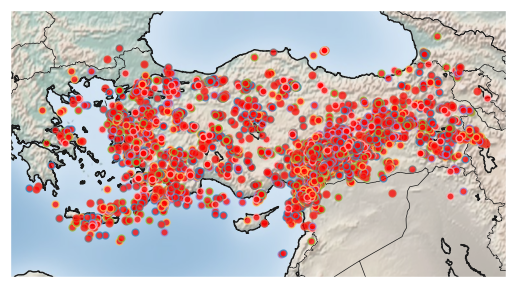

In [67]:
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()
for index, row in new_df.iterrows():
   my_map.plot(row.xm, row.ym, markerfacecolor =([1, 0, 0]),  marker='o', markersize= 5, alpha = 0.75)
plt.show()

The result is a visual representation of earthquake occurrences on a map, with each earthquake shown as a red dot. The map includes coastlines, country borders, filled continents, and shaded relief for context. This visualization helps understand the geographical distribution of earthquakes in the region, highlighting areas with higher seismic activity.

**Clustering of Stations Based on Their Location i.e. Lat & Lon**

We exclusively focus on longitude and latitude as the relevant features for clustering. Consequently, we extract these features and construct a new data frame. In the event of any missing values, we address them by substituting zeros through the 'nan_to_num' function. Subsequently, we standardize these features to ensure that each value is normalized and scaled uniformly.

In [68]:
sklearn.utils.check_random_state(1000)
Clus_dataSet = new_df[['xm', 'ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

In [69]:
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
new_df["Clus_Db"]=labels

In [70]:
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

In [71]:
new_df[[ "DEPTH", "Clus_Db"]].head(5)

DEPTH  Clus_Db
271486   10.3        0
271487    6.6        1
271488    6.4        2
271489   10.7        0
271490    5.3       -1

**Visualization of Clusters Based on Location**

The code snippet below sets up a large map of a specified geographic region, draws geographic features (coastlines, countries, continents, shaded relief), and plots clusters of data points. Each cluster is coloured and annotated with its average depth. The printed output provides a quick summary of the average depth of each cluster.

Cluster 0, Avg Depth: 8.741789416257502
Cluster 1, Avg Depth: 7.624242424242425
Cluster 2, Avg Depth: 6.264285714285714
Cluster 3, Avg Depth: 9.376060606060605
Cluster 4, Avg Depth: 8.4725
Cluster 5, Avg Depth: 4.9799999999999995
Cluster 6, Avg Depth: 8.420595690747781
Cluster 7, Avg Depth: 6.992857142857143
Cluster 8, Avg Depth: 8.137037037037038
Cluster 9, Avg Depth: 14.614953271028037
Cluster 10, Avg Depth: 2.1100000000000003
Cluster 11, Avg Depth: 9.967821782178218
Cluster 12, Avg Depth: 12.419178082191781
Cluster 13, Avg Depth: 7.884722222222223
Cluster 14, Avg Depth: 9.026744186046512
Cluster 15, Avg Depth: 8.144444444444444
Cluster 16, Avg Depth: 7.605882352941177
Cluster 17, Avg Depth: 7.356249999999999
Cluster 18, Avg Depth: 8.754166666666666
Cluster 19, Avg Depth: 7.638461538461538
Cluster 20, Avg Depth: 7.027777777777777
Cluster 21, Avg Depth: 8.0625
Cluster 22, Avg Depth: 7.25
Cluster 23, Avg Depth: 7.241666666666667
Cluster 24, Avg Depth: 8.958333333333334
Cluster 25, Avg 

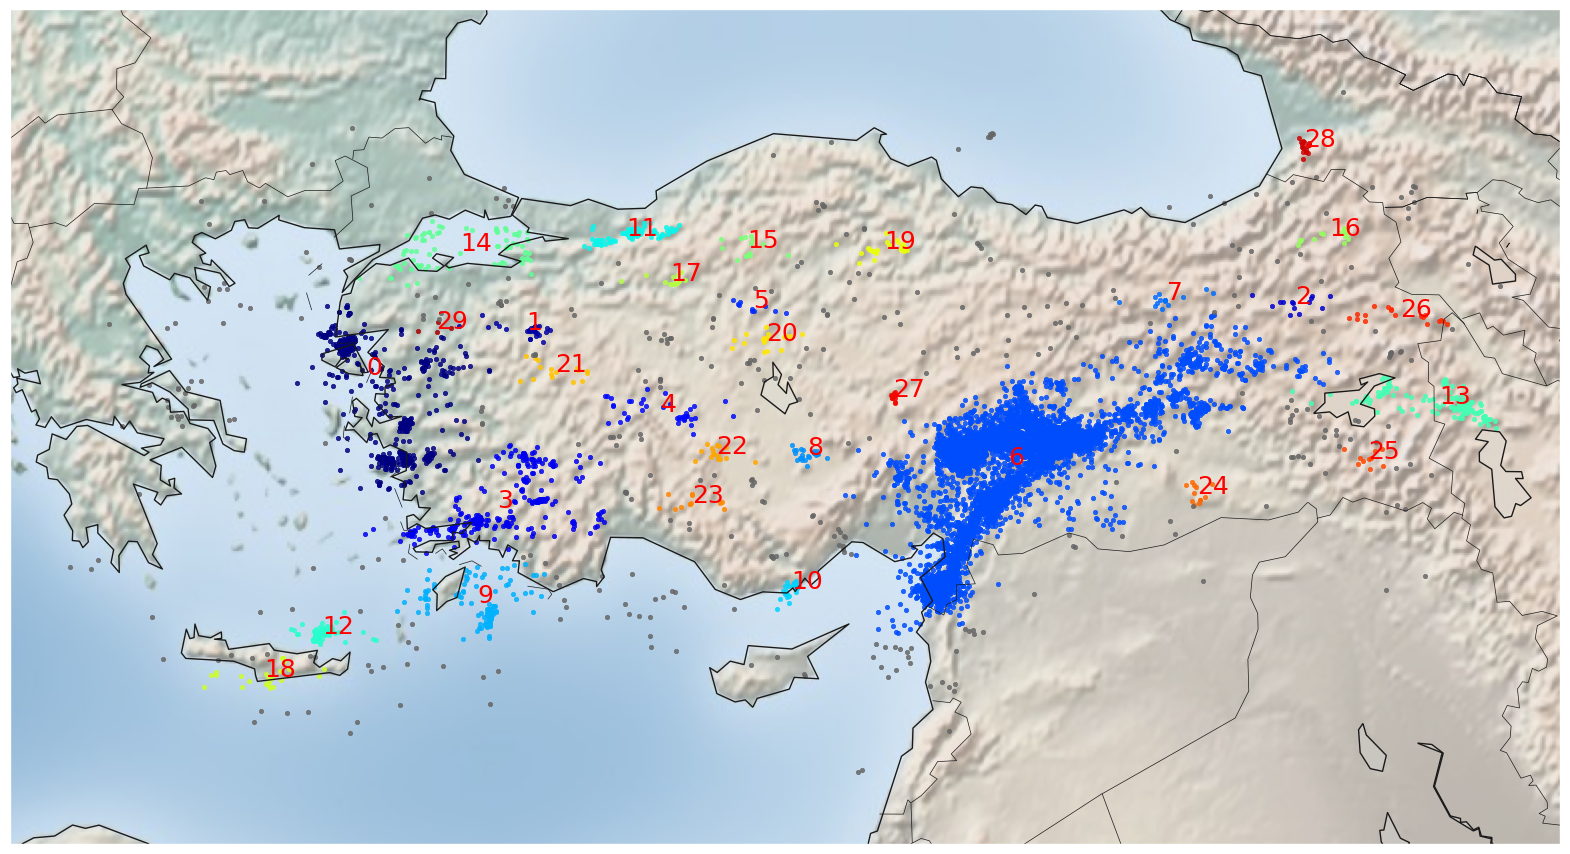

In [72]:
from pylab import rcParams
rcParams['figure.figsize'] = (20, 20)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=min_lon, llcrnrlat=min_lat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=max_lon, urcrnrlat=max_lat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

for clust_number in set(labels):
    c=(([0.4, 0.4, 0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = new_df[new_df.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color=c,  marker='o', s=10, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx, ceny, str(clust_number), fontsize=18, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Depth: '+ str(np.mean(clust_set.DEPTH)))
     

This output shows the average depth of each cluster. The clusters are identified, plotted on the map, and annotated with their average depths. Clusters are visually distinguished by different colours, and outliers or noise are grey.

**Clustering of Sources Based on Their Location i.e. Lat & Lon and Depth**

In [73]:
sklearn.utils.check_random_state(1000)
Clus_dataSet = new_df[['xm', 'ym', 'DEPTH']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

In [74]:
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
new_df["Clus_Db"]=labels

In [75]:
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

In [76]:

new_df[[ "DEPTH", "Clus_Db"]].head(5)

DEPTH  Clus_Db
271486   10.3        4
271487    6.6       -1
271488    6.4       -1
271489   10.7        0
271490    5.3       -1

Cluster 0, Avg Depth: 8.852904929577464
Cluster 1, Avg Depth: 6.888888888888889
Cluster 2, Avg Depth: 8.067213114754098
Cluster 3, Avg Depth: 7.747948717948717
Cluster 4, Avg Depth: 6.9403061224489795
Cluster 5, Avg Depth: 0.0
Cluster 6, Avg Depth: 0.0
Cluster 7, Avg Depth: 8.133566433566433
Cluster 8, Avg Depth: 6.320491803278688
Cluster 9, Avg Depth: 5.033333333333333
Cluster 10, Avg Depth: 5.207142857142857
Cluster 11, Avg Depth: 15.377777777777778
Cluster 12, Avg Depth: 4.964705882352941
Cluster 13, Avg Depth: 5.0600000000000005
Cluster 14, Avg Depth: 0.0
Cluster 15, Avg Depth: 5.038461538461538
Cluster 16, Avg Depth: 16.178571428571427
Cluster 17, Avg Depth: 0.0
Cluster 18, Avg Depth: 12.508333333333335
Cluster 19, Avg Depth: 2.0090909090909093
Cluster 20, Avg Depth: 11.27
Cluster 21, Avg Depth: 7.210000000000001
Cluster 22, Avg Depth: 16.37


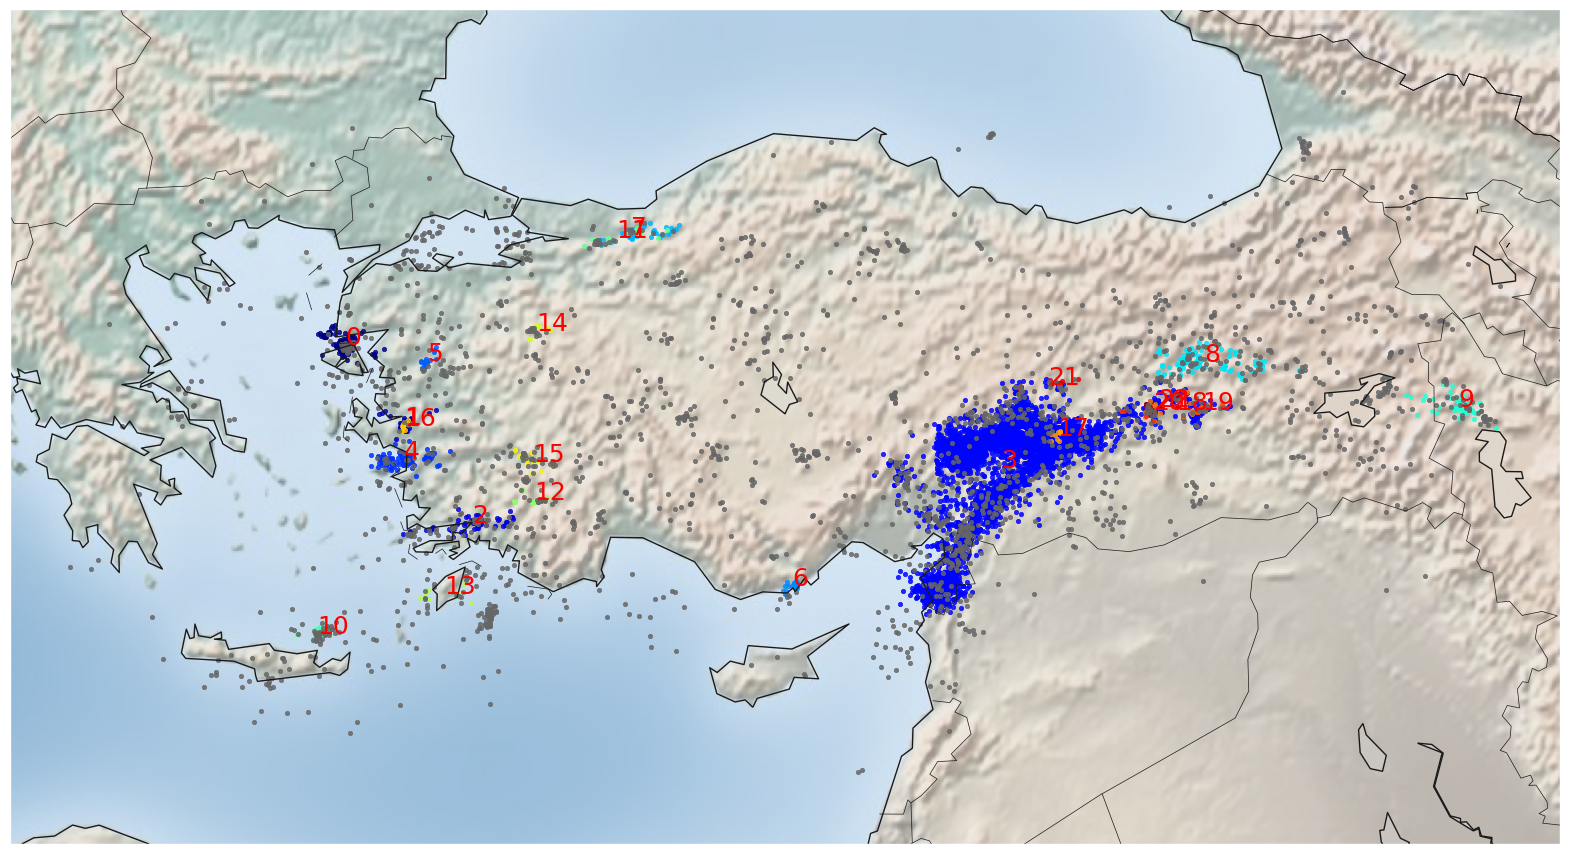

In [77]:
my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=min_lon, llcrnrlat=min_lat,
            urcrnrlon=max_lon, urcrnrlat=max_lat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

for clust_number in set(labels):
    c=(([0.4, 0.4, 0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = new_df[new_df.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color=c,  marker='o', s=10, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx, ceny, str(clust_number), fontsize=18, color='red')
        print ("Cluster " + str(clust_number)+', Avg Depth: '+ str(np.mean(clust_set.DEPTH)))

Detailed Explanation of the Results

* Clusters and Average Depths: The output lists each cluster (numbered from 0 to 22) along with their average depths. These depths are calculated from the DEPTH column of the new_df DataFrame.

* Special Case for Cluster -1: Typically, clust_number == -1 is used to denote outliers or noise points. These points are colored grey ([0.4, 0.4, 0.4]).

* Cluster Centroids: For each cluster (excluding noise/outliers), the centroid coordinates (average x and y positions) are calculated and used to place a text label on the map, indicating the cluster number.

* Visualization: The map includes various geographical features such as coastlines, country borders, continents filled with a translucent white color, and shaded relief for a 3D effect. The cluster points are overlaid on this map, colored according to their cluster assignment.

**Visualization of Clusters Based on Location and Magnitude**

In [78]:
sklearn.utils.check_random_state(1000)
Clus_dataSet = new_df[['xm', 'ym', 'MAG']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)
     

In [79]:
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
new_df["Clus_Db"]=labels
     

In [80]:
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))
     

In [81]:
new_df[[ "MAG", "Clus_Db"]].head(5)

MAG  Clus_Db
271486  1.8        0
271487  1.5        1
271488  2.1       -1
271489  1.0        2
271490  4.4       -1

Cluster 0, Avg Magnitude: 1.7154255319148937
Cluster 1, Avg Magnitude: 1.3909090909090909
Cluster 2, Avg Magnitude: 1.9445026178010472
Cluster 3, Avg Magnitude: 1.6445205479452056
Cluster 4, Avg Magnitude: 1.6408000000000003
Cluster 5, Avg Magnitude: 2.4458367204738125
Cluster 6, Avg Magnitude: 1.9040000000000001
Cluster 7, Avg Magnitude: 1.5953757225433527
Cluster 8, Avg Magnitude: 2.3705882352941177
Cluster 9, Avg Magnitude: 2.257142857142857
Cluster 10, Avg Magnitude: 2.6043478260869564
Cluster 11, Avg Magnitude: 2.9705882352941173
Cluster 12, Avg Magnitude: 2.405
Cluster 13, Avg Magnitude: 1.3
Cluster 14, Avg Magnitude: 2.022222222222222
Cluster 15, Avg Magnitude: 4.026315789473684
Cluster 16, Avg Magnitude: 2.6
Cluster 17, Avg Magnitude: 3.8666666666666667


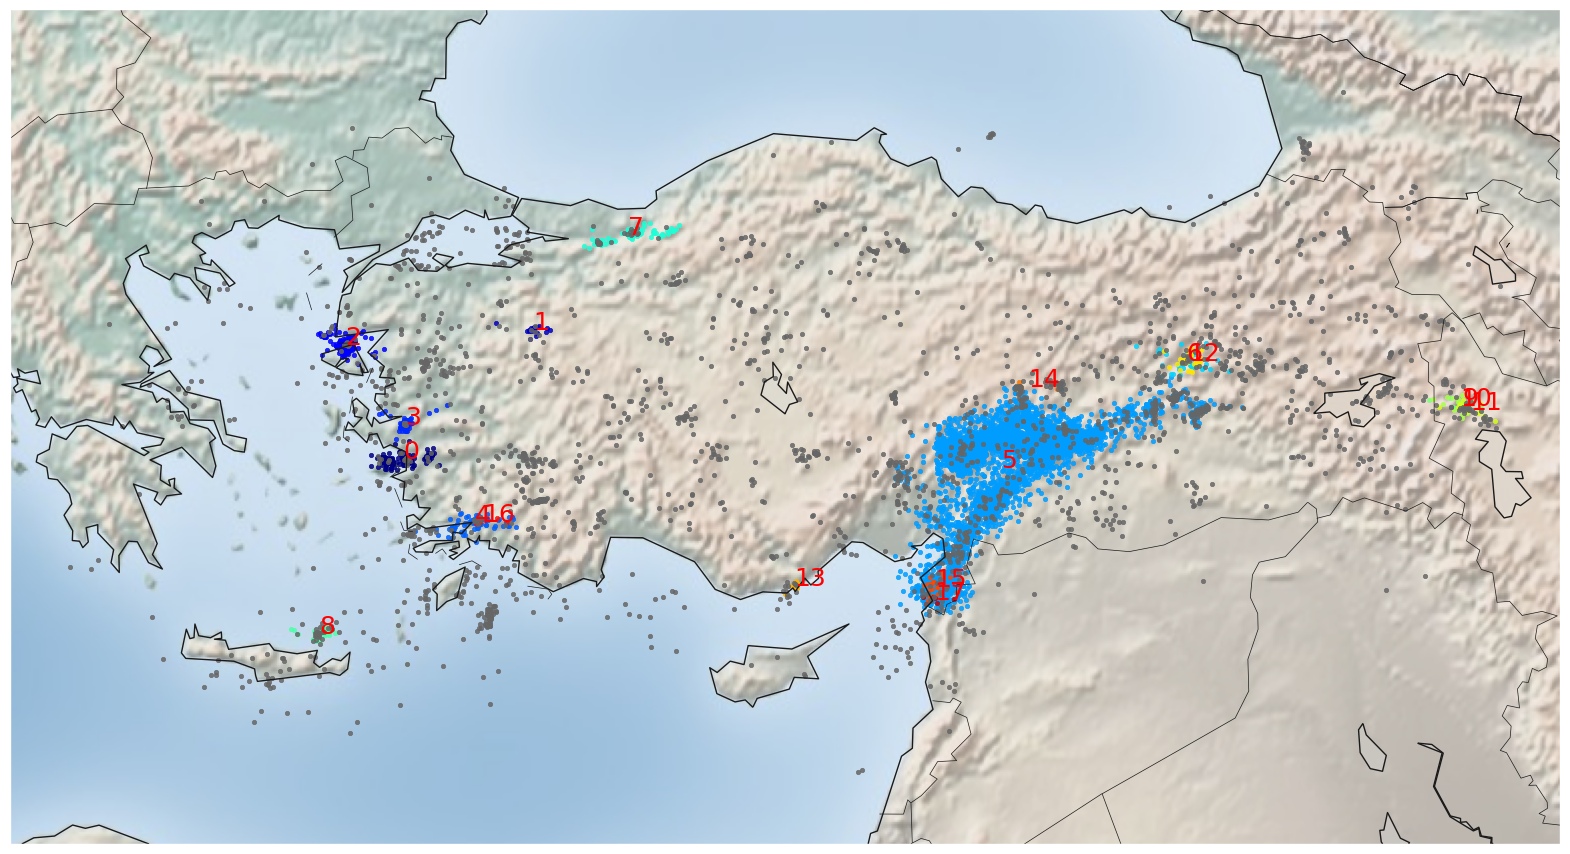

In [82]:
my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=min_lon, llcrnrlat=min_lat,
            urcrnrlon=max_lon, urcrnrlat=max_lat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

for clust_number in set(labels):
    c=(([0.4, 0.4, 0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = new_df[new_df.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color=c,  marker='o', s=10, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx, ceny, str(clust_number), fontsize=18, color='red')
        print ("Cluster " + str(clust_number)+', Avg Magnitude: '+ str(np.mean(clust_set.MAG)))
     

The code generates a map using the Mercator projection, drawing coastlines, countries, and continents with shaded relief. It then plots earthquake clusters with distinct colors based on their cluster labels. For each cluster, the average magnitude of earthquakes is calculated and displayed on the map as a text label at the cluster's centroid. The results indicate the average magnitude of each cluster, providing insights into the spatial distribution and intensity of earthquakes in the specified region.

This plot provides an overview of the seismic activity, with each cluster's average magnitude helping to understand the relative strength of earthquakes in different regions.

# Conclusion

In this notebook,

* We analyzed the reasons and patterns of earthquakes in Turkey.

* We visualized the earthquake data.

* We used DBSCAN for clustering the data based on magnitude, location, and depth.

* We interpreted each code snippet and explained the graphical results.


**This is a humble effort to contribute to the community. If you found it helpful, please show your appreciation by** <span style="color: red;">UPVOTING ♡ </span>

Thank you for your time !